# Alzheimer's Diagnosis Classification EDA & ML

## Initialiations and Downloads

In [2]:
pip install -U scikit-learn imbalanced-learn --quiet

zsh(6471) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)
python(6471) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import plotly
import scipy.stats as st

%matplotlib inline

import time
import math
import sklearn.metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

import sklearn.preprocessing

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE

## Preprocessing

In [5]:
initial_time = time.time()
initial_time

1757134762.7398558

I timed the execution of this notebook because it took my CPU nearly three hours to run entirely. The runtime is noted at the end of the notebook.

In [7]:
df = pd.read_csv('Downloads/alzheimers_prediction_dataset.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [9]:
df.describe()

Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000

In [10]:
df.sample(5)

Country  Age Gender  Education Level   BMI Physical Activity Level  \
6542   Norway   83   Male                3  21.2                    High   
73963  Russia   75   Male               16  30.6                    High   
35025     USA   82   Male                5  28.8                     Low   
67202  Norway   82   Male               12  29.4                     Low   
38055   India   56   Male                6  29.0                    High   

      Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
6542          Former               Never       No           No  ...   
73963         Former        Occasionally      Yes           No  ...   
35025          Never        Occasionally       No           No  ...   
67202         Former               Never       No           No  ...   
38055          Never               Never       No           No  ...   

      Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
6542         Average                 Medium           Employed         Single   
73963      Unhealthy                   High           Employed        Widowed   
35025        Healthy                   High            Retired        Widowed   
67202      Unhealthy                   High           Employed         Single   
38055        Average                 Medium            Retired         Single   

      Genetic Risk Factor (APOE-ε4 allele) Social Engagement Level  \
6542                                    No                     Low   
73963                                  Yes                    High   
35025                                   No                    High   
67202                                   No                  Medium   
38055                                   No                    High   

      Income Level Stress Levels Urban vs Rural Living Alzheimer’s Diagnosis  
6542           Low        Medium                 Urban                    No  
73963       Medium        Medium                 Urban                    No  
35025         High          High                 Urban                   Yes  
67202          Low           Low                 Urban                   Yes  
38055         High        Medium                 Rural                    No  

[5 rows x 25 columns]

In [11]:
for i in df.columns:
    print(df[i].value_counts(normalize=True).head(5))

Country
Brazil          0.051681
Germany         0.051250
Australia       0.050981
Russia          0.050860
South Africa    0.050617
Name: proportion, dtype: float64
Age
72    0.023303
82    0.023047
64    0.023007
60    0.022926
50    0.022899
Name: proportion, dtype: float64
Gender
Female    0.501447
Male      0.498553
Name: proportion, dtype: float64
Education Level
14    0.051290
1     0.050913
6     0.050886
15    0.050806
7     0.050442
Name: proportion, dtype: float64
BMI
19.6    0.006866
29.6    0.006866
31.4    0.006731
32.6    0.006718
29.1    0.006691
Name: proportion, dtype: float64
Physical Activity Level
High      0.334572
Low       0.333239
Medium    0.332189
Name: proportion, dtype: float64
Smoking Status
Current    0.335406
Never      0.333051
Former     0.331543
Name: proportion, dtype: float64
Alcohol Consumption
Never           0.334733
Regularly       0.333024
Occasionally    0.332243
Name: proportion, dtype: float64
Diabetes
No     0.801354
Yes    0.198646
Name: p

Value counts of each field allows for a quick view of the values of categorical variables and allows for a brief search for nulls or placeholder values that isna() wouldn't find.

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

There are no duplicated or null values in the dataset.

## EDA

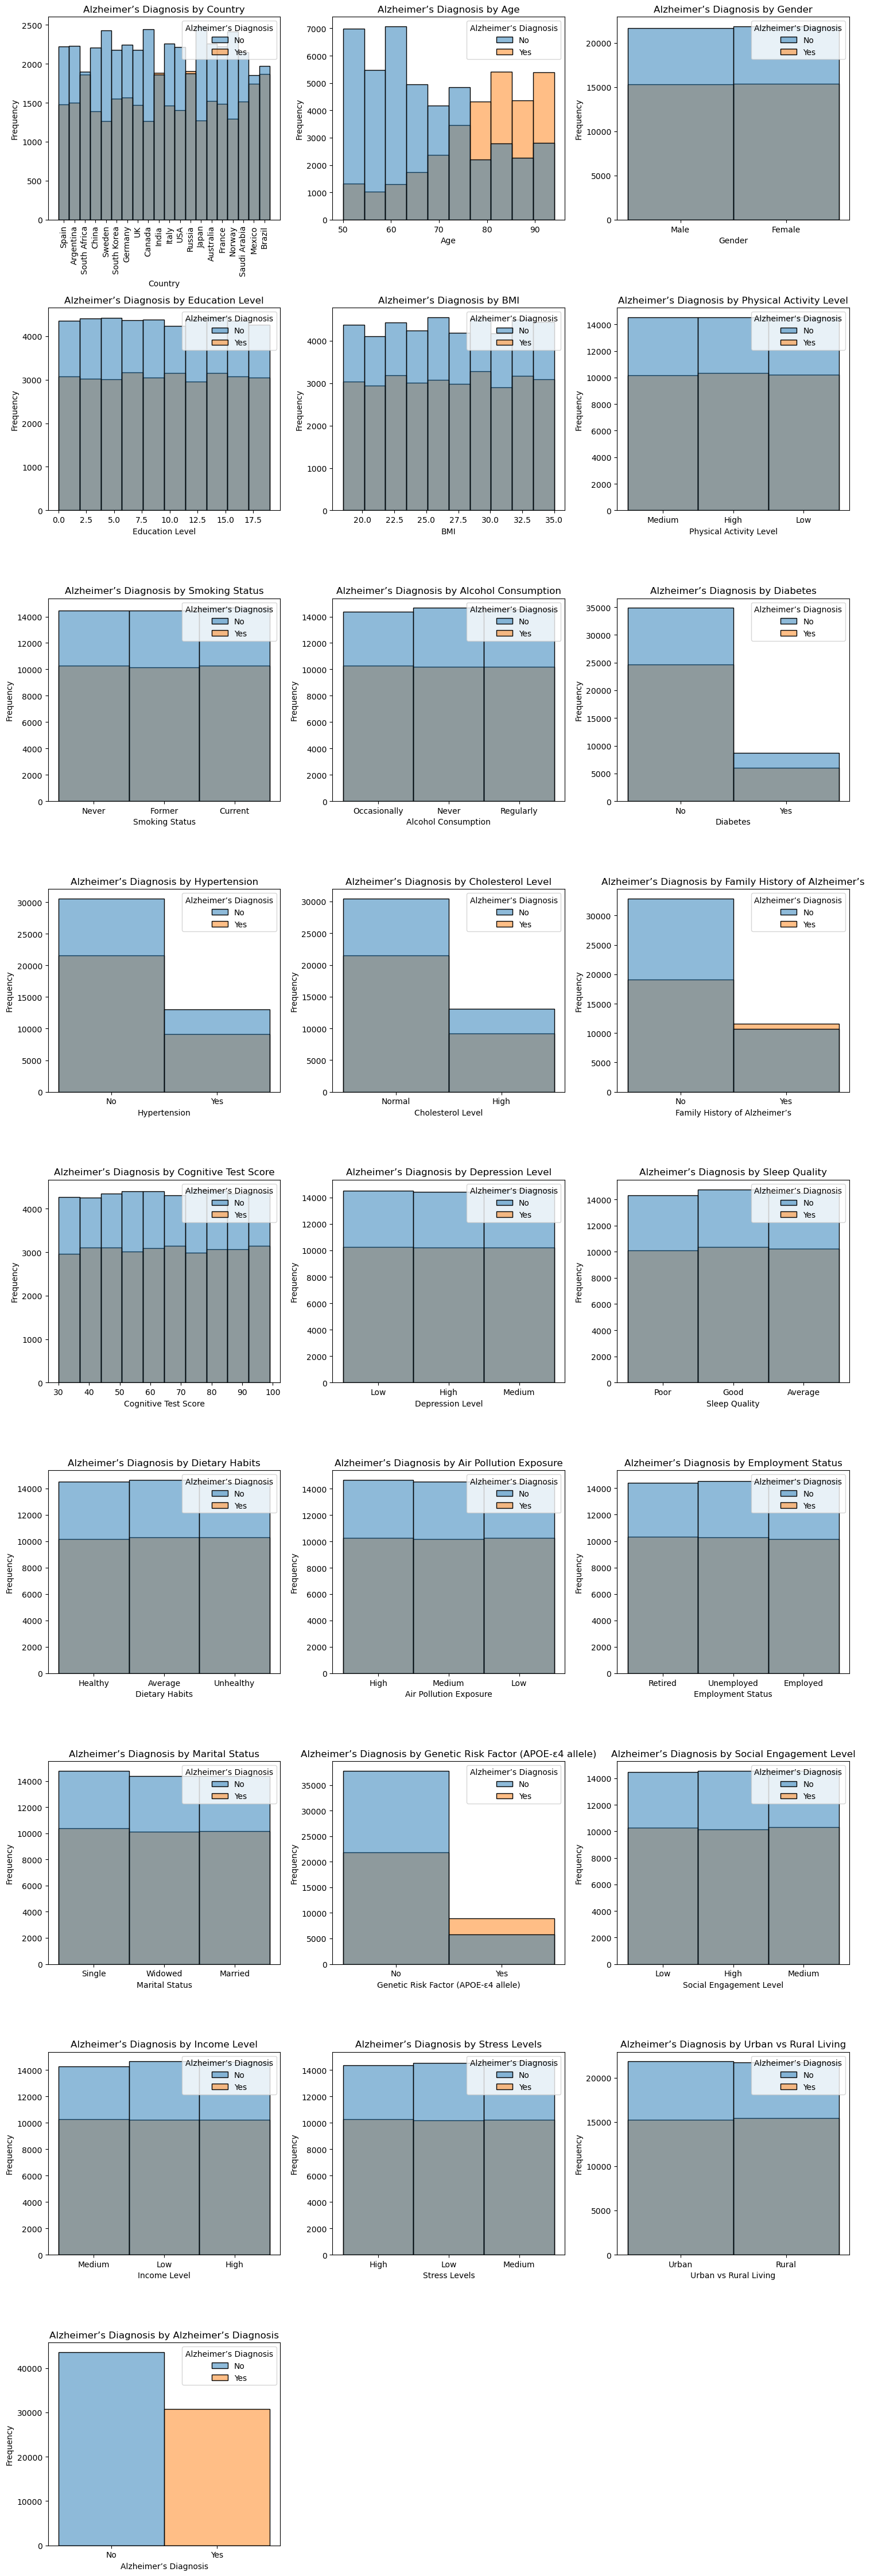

In [198]:
numeric_columns = df.columns

# Set up the number of rows and columns for subplots
n = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate the number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, kde=False, ax=axes[i], bins=10, edgecolor='black', color='skyblue', hue='Alzheimer’s Diagnosis')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Alzheimer’s Diagnosis by {col}')
    if col == 'Country':
        axes[i].tick_params(axis='x', rotation=90)


# Hide any extra subplots if the numeric columns are not divisible by three.
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to ensure there's no overlap
plt.tight_layout()

# Show the figure
plt.show()

The grey areas of the subplots represent overlap between a positive and negative Alzheimer's Diagnosis in the histogram of the field. Which diagnosis is more common depends on whether the blue or orange tops the histogram plot.

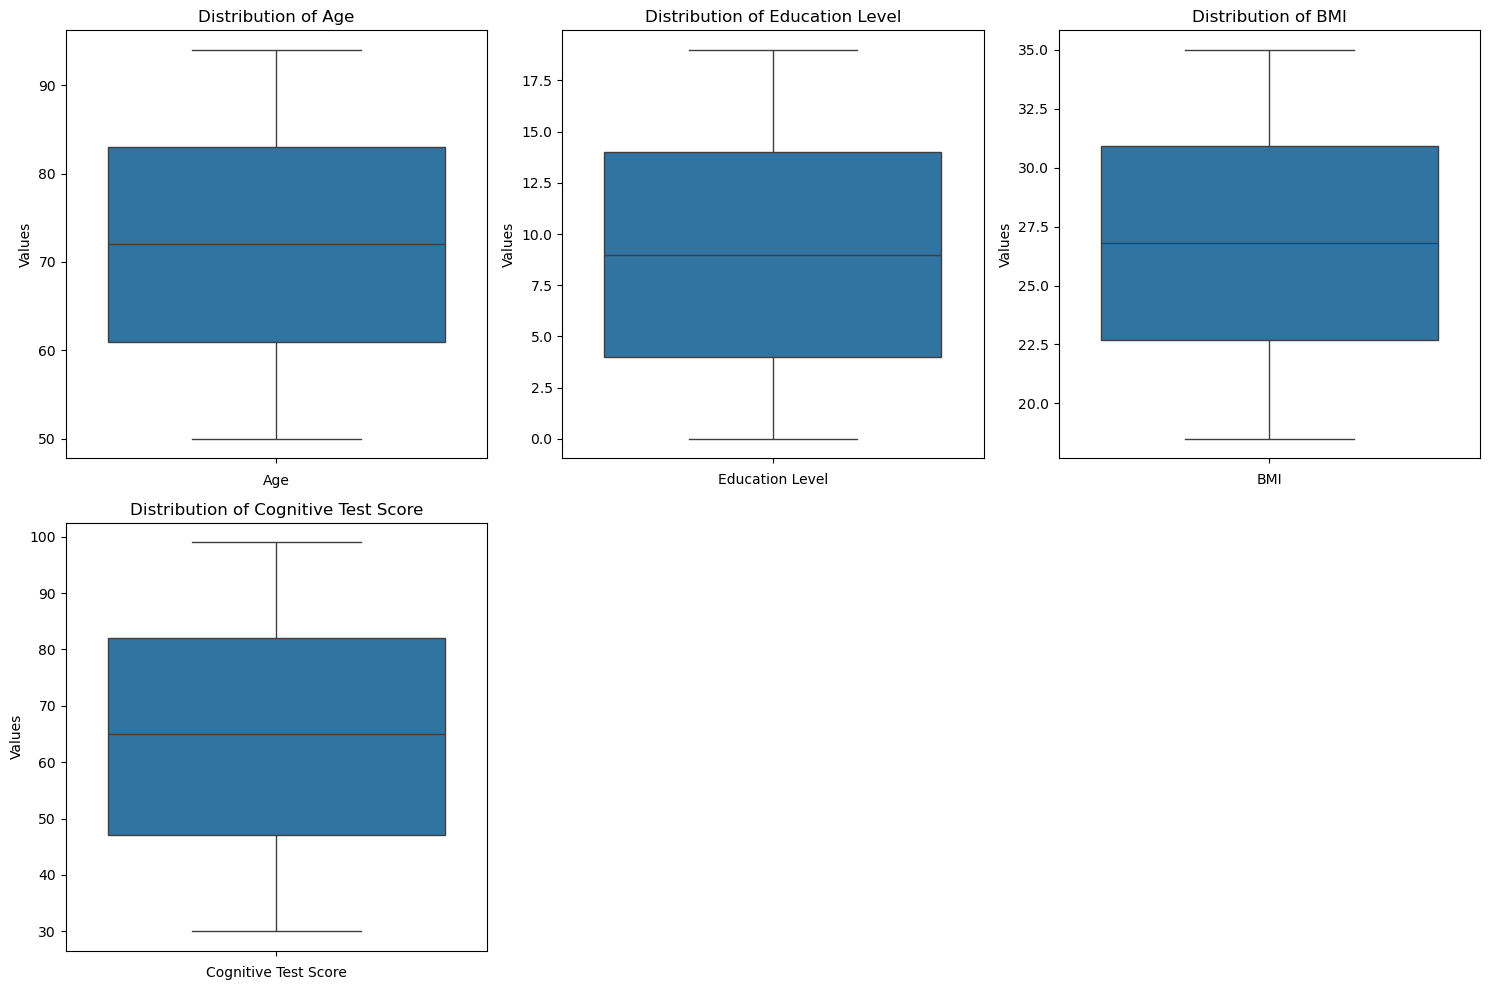

In [19]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the number of rows and columns for subplots
n = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate the number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot a boxplot for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Distribution of {col}')
   # axes[i].tick_params(axis='x', rotation=90)

# Hide any extra subplots if the numeric columns are not divisible by three.
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to ensure there's no overlap
plt.tight_layout()

# Show the figure
plt.show()

In [20]:
df.groupby('Gender')['Genetic Risk Factor (APOE-ε4 allele)'].value_counts()

Gender  Genetic Risk Factor (APOE-ε4 allele)
Female  No                                      29874
        Yes                                      7375
Male    No                                      29687
        Yes                                      7347
Name: count, dtype: int64

In [21]:
categorical_features = df.columns.drop(['Age', 'Education Level', 'BMI', 'Cognitive Test Score'])
df_ord = df.copy()
encoder = OrdinalEncoder()
df_ord[categorical_features] = encoder.fit_transform(df[categorical_features])
df_ord.sample(5)

Country  Age  Gender  Education Level   BMI  Physical Activity Level  \
60538     15.0   89     1.0                4  19.3                      2.0   
4574      14.0   57     0.0                4  23.6                      1.0   
20070     19.0   66     0.0               17  19.9                      1.0   
39458      4.0   92     0.0               18  34.2                      2.0   
64934      3.0   58     1.0                4  20.9                      1.0   

       Smoking Status  Alcohol Consumption  Diabetes  Hypertension  ...  \
60538             2.0                  2.0       1.0           0.0  ...   
4574              0.0                  1.0       0.0           0.0  ...   
20070             0.0                  0.0       0.0           1.0  ...   
39458             1.0                  0.0       1.0           0.0  ...   
64934             2.0                  0.0       0.0           0.0  ...   

       Dietary Habits  Air Pollution Exposure  Employment Status  \
60538             0.0                     0.0                1.0   
4574              0.0                     1.0                1.0   
20070             2.0                     2.0                2.0   
39458             0.0                     0.0                1.0   
64934             0.0                     1.0                1.0   

       Marital Status  Genetic Risk Factor (APOE-ε4 allele)  \
60538             1.0                                   0.0   
4574              1.0                                   0.0   
20070             2.0                                   0.0   
39458             1.0                                   0.0   
64934             0.0                                   0.0   

       Social Engagement Level  Income Level  Stress Levels  \
60538                      1.0           2.0            1.0   
4574                       0.0           0.0            2.0   
20070                      0.0           1.0            1.0   
39458                      1.0           0.0            1.0   
64934                      1.0           1.0            2.0   

       Urban vs Rural Living  Alzheimer’s Diagnosis  
60538                    0.0                    0.0  
4574                     1.0                    0.0  
20070                    0.0                    0.0  
39458                    0.0                    0.0  
64934                    1.0                    0.0  

[5 rows x 25 columns]

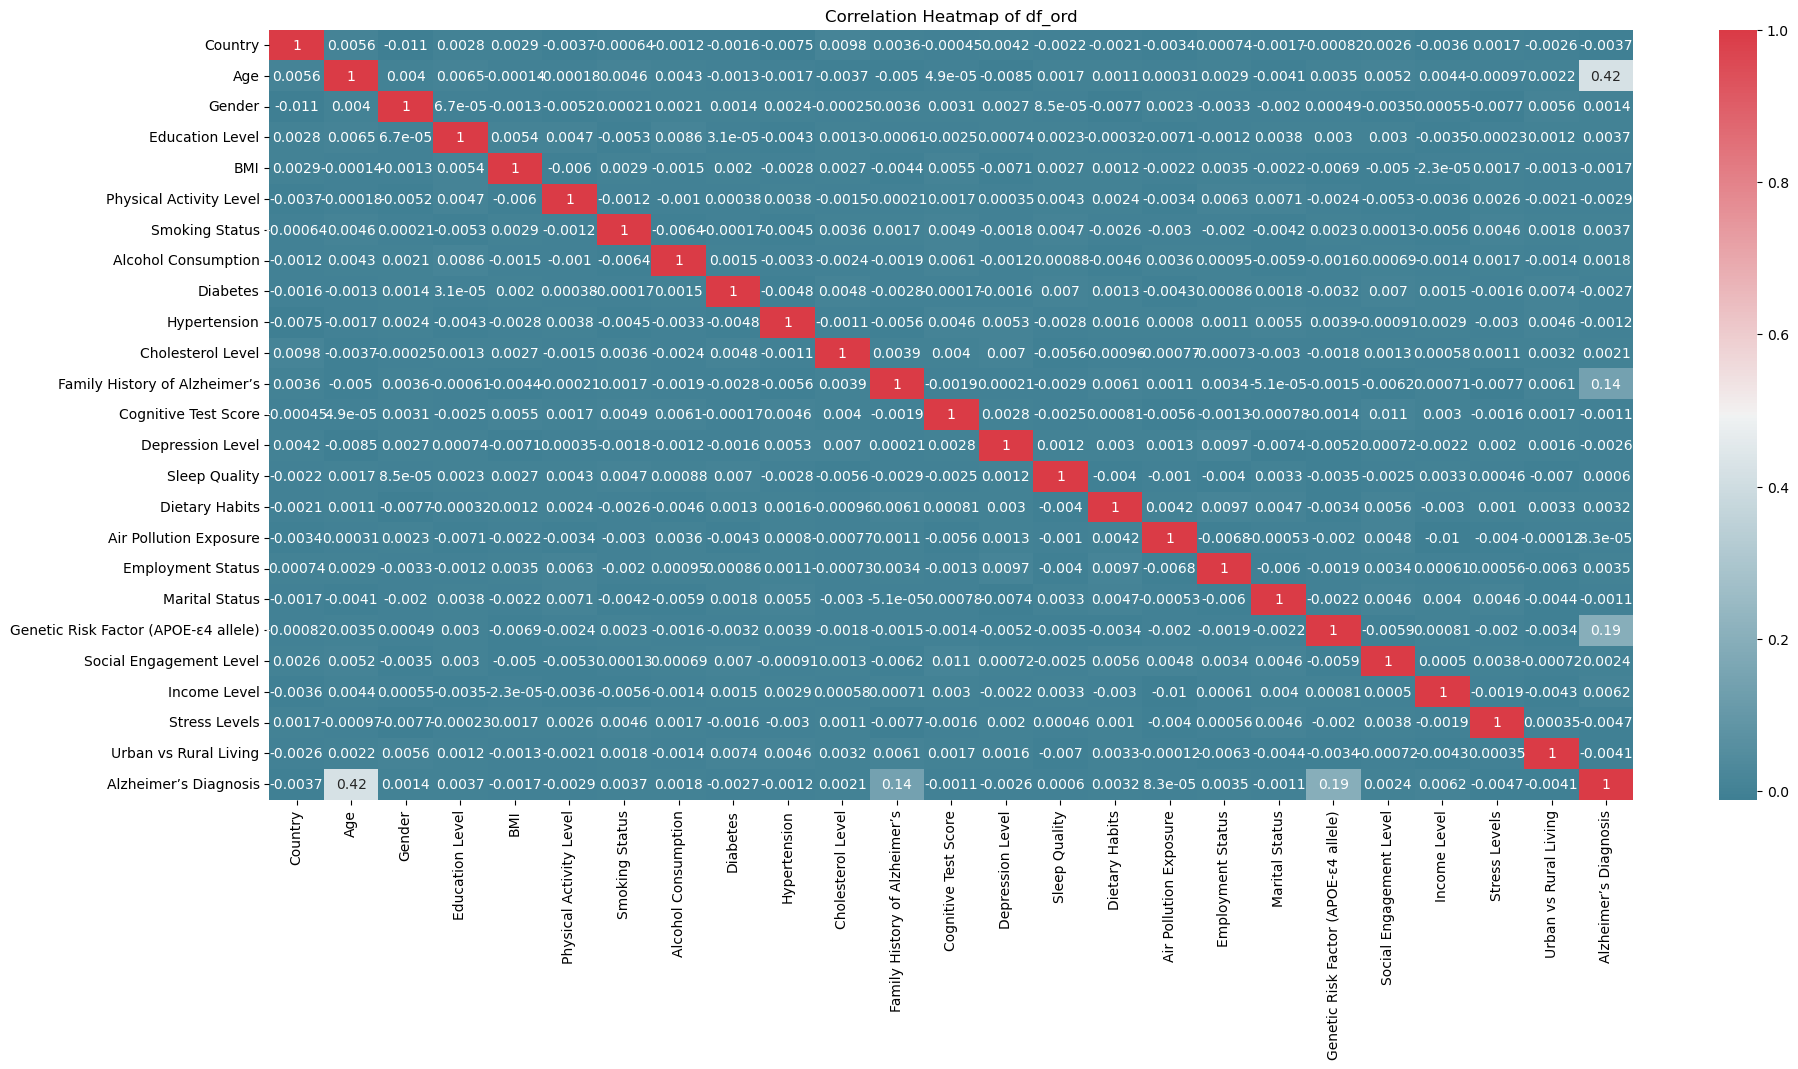

In [22]:
numerical_columns = df_ord.select_dtypes(include=[np.number])
corr = numerical_columns.corr()
plt.figure(figsize=(22, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)
plt.title(label='Correlation Heatmap of df_ord')
plt.show()

Alzheimer's disease is associated with 'Age', 'family history of Alzheimer's', and 'Genetic Risk Factor (APOE-ε4 allele)'.

c

In [25]:
train_ord, test_ord = train_test_split(df_ord, test_size=0.2, random_state=42)

# Then split the train+val into train and validation
test_ord, val_ord = train_test_split(test_ord, test_size=.5, random_state=42)  # 0.5 x 0.2 = 0.1

The number of categorical variables and the desire to not add more dimensionality to the data made ordinal encoding the most sensible choice.

In [27]:
train_ord.shape

(59426, 25)

In [28]:
val_ord.shape

(7429, 25)

In [29]:
test_ord.shape

(7428, 25)

In [30]:
train_ord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59426 entries, 14565 to 15795
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               59426 non-null  float64
 1   Age                                   59426 non-null  int64  
 2   Gender                                59426 non-null  float64
 3   Education Level                       59426 non-null  int64  
 4   BMI                                   59426 non-null  float64
 5   Physical Activity Level               59426 non-null  float64
 6   Smoking Status                        59426 non-null  float64
 7   Alcohol Consumption                   59426 non-null  float64
 8   Diabetes                              59426 non-null  float64
 9   Hypertension                          59426 non-null  float64
 10  Cholesterol Level                     59426 non-null  float64
 11  Family History o

In [31]:
feature_columns = df_ord.columns.drop('Alzheimer’s Diagnosis').tolist()
scaler = StandardScaler()

train_ord.loc[:, feature_columns] = scaler.fit_transform(train_ord.loc[:, feature_columns])
    
# Transform the validation and test sets
val_ord.loc[:, feature_columns] = scaler.transform(val_ord.loc[:, feature_columns])
test_ord.loc[:, feature_columns] = scaler.transform(test_ord.loc[:, feature_columns])

## Modeling

These methods are meant to create models, evaluate them, and generate reports on their performance. There are methods to plot certain performance metrics and feature importance charts. I also have methods for upsampling, downsampling, and SMOTE to ensure a class balance after data splitting. All methods are run in the next section.

In [34]:
eval_stats_all = pd.DataFrame()

In [35]:
def model_to_string(model):
    # Method records the name and parameters of each model and returns it as a string.
    model_name = type(model).__name__  # Get the class name of the model
    params = model.get_params()  # Get the model parameters
    params_str = ', '.join(f'{k}={v}' for k, v in params.items())  # Create a formatted string of parameters
    return f"{model_name}({params_str})"

In [36]:
def record_metrics(model, df_eval_stats):
    # Method records the performance of each model on the test set in a global dataframe for easy reference and comparison in the
    # 'Conclusions' section. Returns an updated dataframe.
    global eval_stats_all

    metrics_row = {
        'model_name': type(model).__name__,
        'full_model': model_to_string(model),
        'test_accuracy': df_eval_stats['test'].get('Accuracy', None),
        'test_f1': df_eval_stats['test'].get('F1', None),
        'test_roc_auc': df_eval_stats['test'].get('ROC AUC', None),
        'test_aps': df_eval_stats['test'].get('APS', None)
    }
    
    metrics_df = pd.DataFrame([metrics_row])
    
    # Concatenate the new row to the existing DataFrame
    eval_stats_all = pd.concat([eval_stats_all, metrics_df], ignore_index=True)
            
    return eval_stats_all

In [37]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target, val_features=None, val_target=None):
    # Method plots several graphs for a model's performance as well as prints out evaluation
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 

    if (val_features is None or val_target is None):
        sets = (('train', train_features, train_target), ('test', test_features, test_target))
    else: 
        sets = (('train', train_features, train_target), ('val', val_features, val_target), ('test', test_features, test_target))
    
    for type, features, target in sets:
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        elif type == 'val':
            color = 'pink'
        elif type == 'test':
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(6)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    record_metrics(model, df_eval_stats)
    
    print(df_eval_stats)
    plt.show()
    
    return

In [38]:
def structure_confusion_matrix(matrix):
        #  This  method  structures  a  confusion_matrix  instance  so  that  it  is  easier  read.
        print('Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.')
        display(pd.DataFrame(matrix,  columns=['Predicted  False',  'Predicted  True'],  index=['Is  False',  'Is  True']).div(matrix.sum(axis=1),  axis=0))
        display(pd.DataFrame(matrix,  columns=['Predicted  False',  'Predicted  True'],  index=['Is  False',  'Is  True']))

In [39]:
def chart_feature_importance(features_train, model):
    # Feature importance charts can render which features were most consequential to a model. These charts can be created for tree-based and
    # gradient boosting algorithms.
    
    # Get feature importances
    importances = model.feature_importances_
    feature_names = features_train.columns
    
    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    
    # Sort the DataFrame by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=True)
    
    # Plot feature importances

    fig = px.bar(importance_df, x="Importance", y="Feature", orientation='h',
             hover_data=["Importance"],
          #   height=400,
             title='Feature Importance',
            color_discrete_sequence=['skyblue'])
    fig.show()

In [40]:
def downsample(train_df, target_field):
    # Method breaks a dataframe into features and the target field. Whichever field is more represented will be
    # randomly sampled until the target feature is evenly split between 0 and 1 values. The dataframe is reassembled,
    # randomly shuffled, and returned.
    features = train_df.drop([target_field], axis=1)
    target = train_df[target_field]

    class_0, class_1 = target.value_counts()
    
    if class_0 > class_1:
        train_df = pd.concat([train_df.loc[train_df[target_field]<=0, :].sample(class_1, random_state=42), train_df.loc[train_df[target_field]>=1, :]], axis=0).sample(frac=1)
    elif class_1 > class_0:
        train_df = pd.concat([train_df.loc[train_df[target_field]>=1, :].sample(class_1, random_state=42), train_df.loc[train_df[target_field]<=0, :]], axis=0).sample(frac=1)
    
    return train_df

In [41]:
def upsample(train_df, target_field):
    # Method breaks a dataframe into features and the target field. Whichever field is less represented will be
    # randomly sampled and replicated until the target feature is evenly split between 0 and 1 values. 
    # The dataframe is reassembled, randomly shuffled, and returned.
    features = train_df.drop([target_field], axis=1)
    target = train_df[target_field]
    
    class_0, class_1 = target.value_counts()
        
    if class_0 > class_1:
        train_df = pd.concat([train_df.loc[train_df[target_field]>=1, :].sample(class_0, replace=True, random_state=42), train_df.loc[train_df[target_field]<=0, :]], axis=0).sample(frac=1)
    elif class_1 > class_0:
        train_df = pd.concat([train_df.loc[train_df[target_field]<=0, :].sample(class_1, replace=True, random_state=42), train_df.loc[train_df[target_field]>=1, :]], axis=0).sample(frac=1)
    
    return train_df

In [42]:
def logistic_regression(train_df, val_df, test_df, balanced=None, samp=None, target_field='churn'):

    model = LogisticRegression(random_state=42, solver='liblinear', class_weight=balanced)
    
    train_original = train_df.copy()
    samp = samp.lower()
    
    train_df = choose_sampling(train_df, target_field, samp)

    model.fit(train_df.drop([target_field], axis=1), train_df[target_field])

    test_predictions = model.predict(test_df.drop([target_field], axis=1))

    structure_confusion_matrix(confusion_matrix(test_df[target_field], test_predictions))
    evaluate_model(model, train_features=train_df.drop(columns=target_field, axis=1), train_target=train_df[target_field], 
                   test_features=test_df.drop(columns=target_field, axis=1), test_target=test_df[target_field], 
                   val_features=val_df.drop(columns=target_field, axis=1), val_target=val_df[target_field])

    train_df = train_original.copy()

In [43]:
def random_forest_model(train_df, val_df, test_df, balanced=None, samp=None, target_field='churn'):

    train_original = train_df.copy()
    samp = samp.lower()
    
    train_df = choose_sampling(train_df, target_field, samp)

    model = RandomForestClassifier(random_state=42, class_weight=balanced, n_estimators= 100,
    max_depth=8,       # Maximum depth of the trees
    min_samples_split=3,      # Minimum number of samples required to split an internal node
    min_samples_leaf= 6,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt'  # Number of features to consider when looking for the best split
) # set number of trees
    model.fit(train_df.drop([target_field], axis=1), train_df[target_field]) # train model on training set
    test_predictions = model.predict(test_df.drop([target_field], axis=1))

    structure_confusion_matrix(confusion_matrix(test_df[target_field], test_predictions))
    evaluate_model(model, train_features=train_df.drop(columns=target_field, axis=1), train_target=train_df[target_field], 
                   test_features=test_df.drop(columns=target_field, axis=1), test_target=test_df[target_field], 
                   val_features=val_df.drop(columns=target_field, axis=1), val_target=val_df[target_field])
    chart_feature_importance(features_train=train_df.drop(columns=target_field, axis=1), model=model)

    train_df = train_original.copy()

In [44]:
def extra_trees_model(train_df, val_df, test_df, balanced=None, samp=None, target_field='churn'):

    train_original = train_df.copy()
    samp = samp.lower()
    
    train_df = choose_sampling(train_df, target_field, samp)

    model = ExtraTreesClassifier(random_state=42, class_weight=balanced, n_estimators= 100,
    max_depth=8,       # Maximum depth of the trees
    min_samples_split=3,      # Minimum number of samples required to split an internal node
    min_samples_leaf= 6,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt', 
    bootstrap=True                             # Number of features to consider when looking for the best split
) # set number of trees
    
    model.fit(train_df.drop([target_field], axis=1), train_df[target_field]) # fit model on training set
    test_predictions = model.predict(test_df.drop([target_field], axis=1))

    structure_confusion_matrix(confusion_matrix(test_df[target_field], test_predictions))
    evaluate_model(model, train_features=train_df.drop(columns=target_field, axis=1), train_target=train_df[target_field], 
                   test_features=test_df.drop(columns=target_field, axis=1), test_target=test_df[target_field], 
                   val_features=val_df.drop(columns=target_field, axis=1), val_target=val_df[target_field])
    chart_feature_importance(features_train=train_df.drop(columns=target_field, axis=1), model=model)

    train_df = train_original.copy()

In [45]:
!pip install catboost --quiet

zsh(6479) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)
python(6479) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [46]:
def CatBoostClassifier_model(train_df, val_df, test_df, balanced=None, samp=None, target_field='churn'):
        from catboost import CatBoostClassifier

        train_original = train_df.copy()
        samp = samp.lower()
    
        train_df = choose_sampling(train_df, target_field, samp)

        # Create and train the CatBoost model
        model = CatBoostClassifier(iterations=500, learning_rate=0.1,
                                                            depth=6,
                                                            eval_metric='AUC',
                                                            random_seed=42,
                                                            verbose=0)
    
        model.fit(train_ord.drop([target_field], axis=1), train_ord[target_field], 
             eval_set=(val_ord.drop(columns=target_field, axis=1), val_ord[target_field]), 
             early_stopping_rounds=50)

        test_predictions = model.predict(test_df.drop([target_field], axis=1))

        structure_confusion_matrix(confusion_matrix(test_df[target_field], test_predictions))
        evaluate_model(model, train_features=train_df.drop(columns=target_field, axis=1), train_target=train_df[target_field], 
                   test_features=test_df.drop(columns=target_field, axis=1), test_target=test_df[target_field], 
                   val_features=val_df.drop(columns=target_field, axis=1), val_target=val_df[target_field])
        
        chart_feature_importance(features_train=train_df.drop(columns=target_field, axis=1), model=model)
        train_df = train_original.copy()

In [47]:
from imblearn.over_sampling import SMOTE
import pandas as pd

def choose_sampling(train_df, target_field, samp):
    """
    Applies a sampling method to balance classes in the training data.

    Args:
        train_df (pd.DataFrame): Input training dataframe.
        target_field (str): Name of the target column.
        samp (str): One of {'up', 'down', 'smote'}.

    Returns:
        pd.DataFrame: Resampled dataframe.
    """
    if samp == 'up':
        train_df = upsample(train_df, target_field)
    elif samp == 'down':
        train_df = downsample(train_df, target_field)  
    elif samp == 'smote':
        smote = SMOTE(random_state=42)
        X = train_df.drop(columns=target_field)
        y = train_df[target_field]
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Recombine into a new DataFrame
        train_df = pd.DataFrame(X_resampled, columns=X.columns)
        train_df[target_field] = y_resampled
    else:
        raise ValueError(f"Unknown sampling method: {samp}")

    print(train_df[target_field].value_counts())
    return train_df


In [48]:
from  sklearn.dummy  import  DummyClassifier

def dummy_classifier(train_df, val_df, test_df, balanced=None, samp=None, target_field='churn'):

    dummy  =  DummyClassifier(strategy='constant',  constant=1,  random_state=42)
    dummy.fit(train_ord.drop(columns=target_field),  train_ord[target_field])
    test_predictions = dummy.predict(test_df.drop([target_field], axis=1))
    
    structure_confusion_matrix(confusion_matrix(test_df[target_field], test_predictions))
    evaluate_model(model=dummy, train_features=train_df.drop(columns=target_field, axis=1), train_target=train_df[target_field], 
                   test_features=test_df.drop(columns=target_field, axis=1), test_target=test_df[target_field], 
                   val_features=val_df.drop(columns=target_field, axis=1), val_target=val_df[target_field])

In [49]:
from sklearn.linear_model import SGDClassifier

def sgd_classifier(train_df, val_df, test_df, balanced=None, samp=None, target_field='churn'):

    train_original = train_df.copy()
    samp = samp.lower()
    
    train_df = choose_sampling(train_df, target_field, samp)

    model = SGDClassifier(loss='log_loss', max_iter=1000, tol=.05, random_state=42, learning_rate='adaptive', eta0=.01, verbose=0)
    
    # Fit  the  model  with  evaluation  set
    model.fit(train_ord.drop([target_field], axis=1), train_ord[target_field]) # train model on training set

     #  Predict  on  the  test  data
    test_predictions = model.predict(test_df.drop([target_field], axis=1))

    structure_confusion_matrix(confusion_matrix(test_df[target_field], test_predictions))
    evaluate_model(model, train_features=train_df.drop(columns=target_field, axis=1), train_target=train_df[target_field], 
                   test_features=test_df.drop(columns=target_field, axis=1), test_target=test_df[target_field], 
                   val_features=val_df.drop(columns=target_field, axis=1), val_target=val_df[target_field])
        
    train_df = train_original.copy()

In [50]:
! pip install xgboost --quiet

zsh(6480) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)
python(6480) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [51]:
! pip install --upgrade xgboost --quiet

zsh(6481) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)
python(6481) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [52]:
from xgboost import XGBClassifier

def XGBmodel(train_df, val_df, test_df, balanced=None, samp=None, target_field='churn'):

        train_original = train_df.copy()
        samp = samp.lower()
    
        train_df = choose_sampling(train_df, target_field, samp)

        # Create and configure the XGBoost model
        model = XGBClassifier(
                n_estimators=500,                    #  Similar  to  iterations
                learning_rate=.1,                  #  Learning  rate
                max_depth=5,                              #  Similar  to  depth
                eval_metric='auc', #  Evaluation  metric
                random_state=42,
                verbosity=0                                  #  Verbosity  to  show  evaluation  metrics
        )

        #  Fit  the  model  with  evaluation  set
        model.fit(train_ord.drop([target_field], axis=1), train_ord[target_field], 
                 eval_set=[(val_ord.drop(columns=target_field, axis=1), val_ord[target_field])],
                 verbose=0) # fit model on training set

        #  Predict  on  the  test  data
        test_predictions = model.predict(test_df.drop([target_field], axis=1))

        structure_confusion_matrix(confusion_matrix(test_df[target_field], test_predictions))
        evaluate_model(model, train_features=train_df.drop(columns=target_field, axis=1), train_target=train_df[target_field], 
                   test_features=test_df.drop(columns=target_field, axis=1), test_target=test_df[target_field], 
                   val_features=val_df.drop(columns=target_field, axis=1), val_target=val_df[target_field])
        
        chart_feature_importance(features_train=train_df.drop(columns=target_field, axis=1), model=model)
        train_df = train_original.copy()

In [53]:
! pip install lightgbm --quiet

zsh(6482) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)
python(6482) MallocStackLogging: could not tag MSL-related memory as no_footprint, so those pages will be included in process footprint - (null)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [54]:
from lightgbm import LGBMClassifier

def lgbmclassifier(train_df, val_df, test_df, balanced=None, samp=None, target_field='churn'):

        train_original = train_df.copy()
        samp = samp.lower()
    
        train_df = choose_sampling(train_df, target_field, samp)

        model = LGBMClassifier(boosting_type='gbdt', verbose=0, random_state=42)    #  LGBMClassifier  model

        # Train  the  model
        model.fit(train_ord.drop([target_field], axis=1), train_ord[target_field], 
             eval_set=[(val_ord.drop(columns=target_field, axis=1), val_ord[target_field])], 
             eval_metric='auc')

        #  Predict  on  the  test  data
        test_predictions = model.predict(test_df.drop([target_field], axis=1))

        structure_confusion_matrix(confusion_matrix(test_df[target_field], test_predictions))
        evaluate_model(model, train_features=train_df.drop(columns=target_field, axis=1), train_target=train_df[target_field], 
                   test_features=test_df.drop(columns=target_field, axis=1), test_target=test_df[target_field], 
                   val_features=val_df.drop(columns=target_field, axis=1), val_target=val_df[target_field])
        
        chart_feature_importance(features_train=train_df.drop(columns=target_field, axis=1), model=model)
        train_df = train_original.copy()

## Model Testing

Executing the models creates a report with a confusion matrix, performance metrics for the model on the training, validation, and test sets, plots F1 Score, ROC Curve, and PRC, and a features importance chart if applicable to the model. The validation set is used as an additional test set when not used in combination with a search algorithm or used as an evaluation set for a gradient boosting algorithm. 

### Dummy Baseline

Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False               0.0              1.0
Is  True                0.0              1.0

Predicted  False  Predicted  True
Is  False                 0             4353
Is  True                  0             3075

             train       val      test
Accuracy  0.413540  0.412303  0.413974
F1        0.585112  0.583873  0.585547
APS       0.413540  0.412303  0.413974
ROC AUC   0.500000  0.500000  0.500000


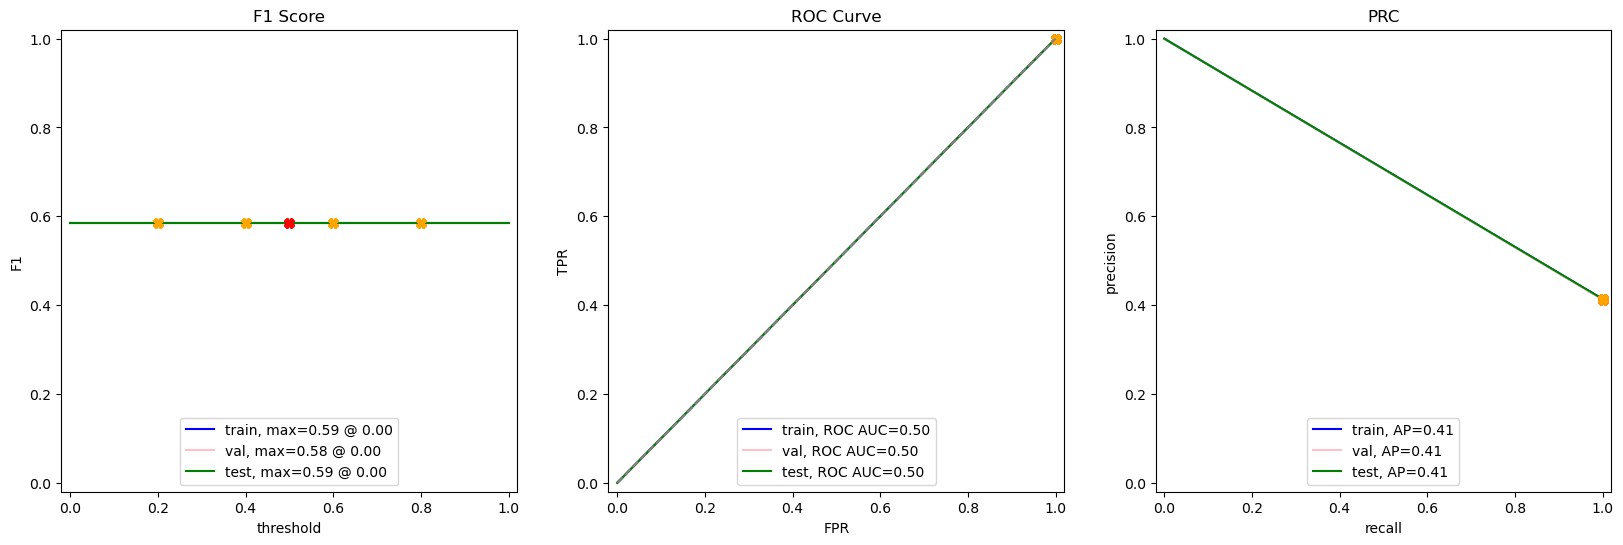

In [58]:
dummy_classifier(train_ord, val_ord, test_ord, balanced=None, samp=None, target_field='Alzheimer’s Diagnosis')

This dummy classifier operates as our sanity check for examining model performance. Every ML model should perform better than this.

### LogisticRegression

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.708936         0.291064
Is  True           0.294309         0.705691

Predicted  False  Predicted  True
Is  False              3086             1267
Is  True                905             2170

             train       val      test
Accuracy  0.712792  0.716247  0.707593
F1        0.715077  0.679050  0.666462
APS       0.765804  0.712212  0.698086
ROC AUC   0.784110  0.790341  0.782858


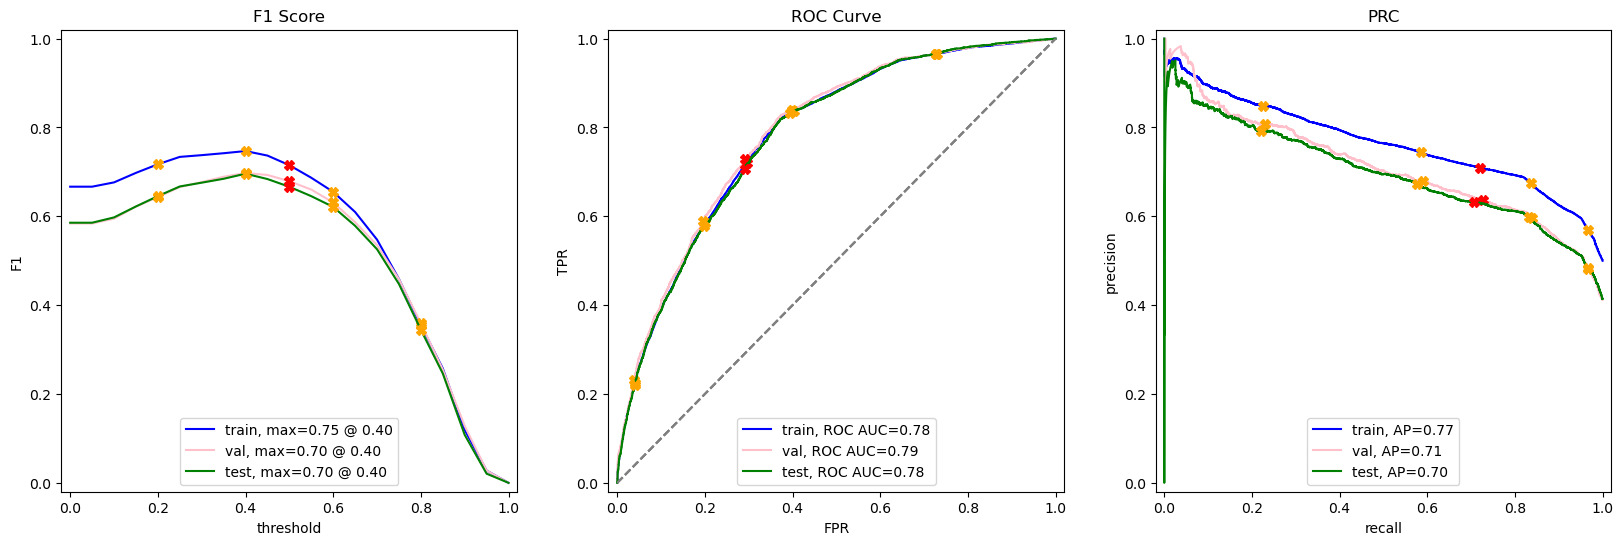

In [61]:
logistic_regression(train_ord, val_ord, test_ord, balanced='balanced', samp='up', target_field="Alzheimer’s Diagnosis")

Alzheimer’s Diagnosis
0.0    24575
1.0    24575
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.708477         0.291523
Is  True           0.288130         0.711870

Predicted  False  Predicted  True
Is  False              3084             1269
Is  True                886             2189

             train       val      test
Accuracy  0.714120  0.716651  0.709882
F1        0.716502  0.679653  0.670136
APS       0.765704  0.712256  0.698090
ROC AUC   0.784893  0.790516  0.782617


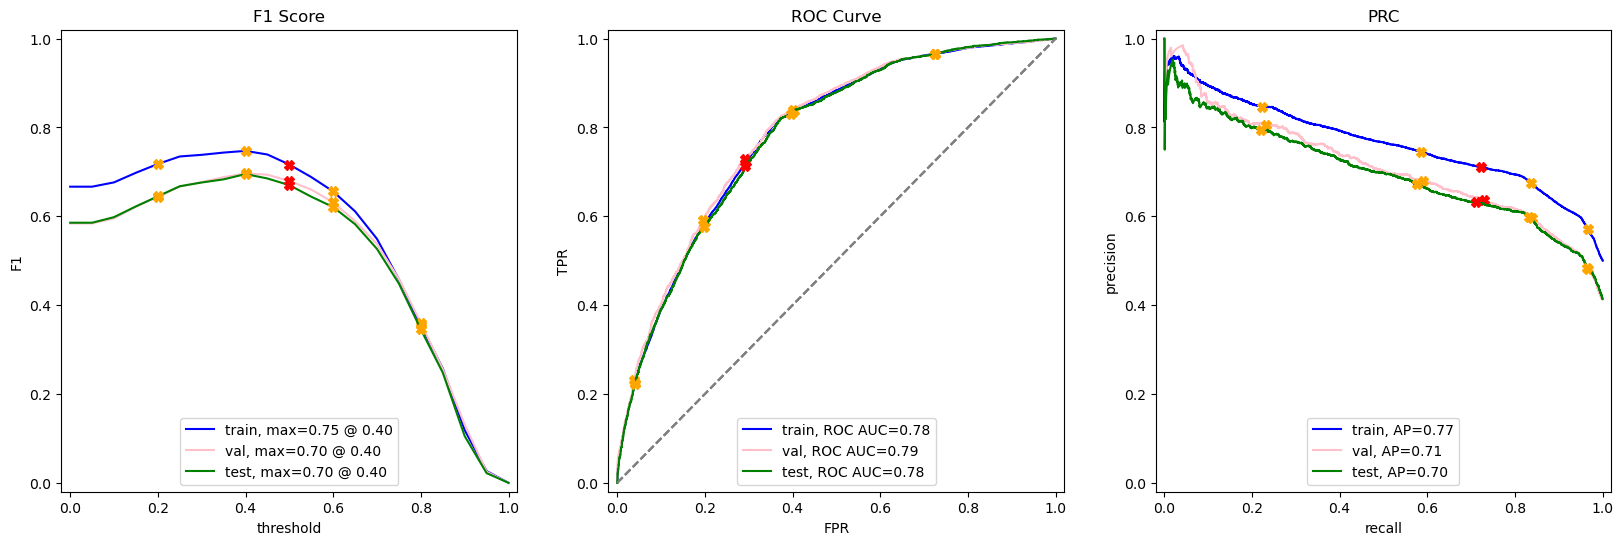

In [62]:
logistic_regression(train_ord, val_ord, test_ord, balanced='balanced', samp='down', target_field="Alzheimer’s Diagnosis")

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.709166         0.290834
Is  True           0.292033         0.707967

Predicted  False  Predicted  True
Is  False              3087             1266
Is  True                898             2177

             train       val      test
Accuracy  0.718100  0.717593  0.708670
F1        0.721168  0.679988  0.667996
APS       0.764314  0.711867  0.697759
ROC AUC   0.788023  0.790485  0.782646


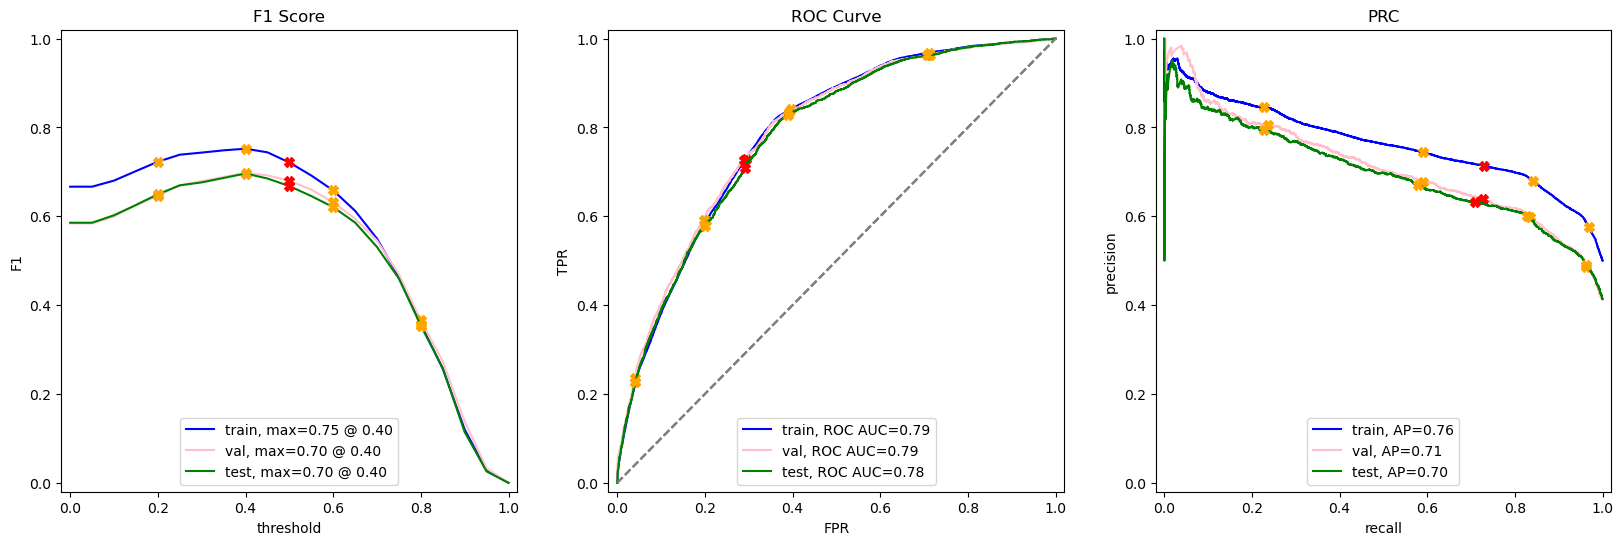

In [63]:
logistic_regression(train_ord, val_ord, test_ord, balanced='balanced', samp='smote', target_field="Alzheimer’s Diagnosis")

Just a simple LogisticRegression makes a significant improvement in the metrics of the test set, though this model does not meet our threshold for success.

### GridSearchCV

Only a few search algorithms were added due to the time requirements they take to find the best model parameters. The command %%time was also added to these cells to provide the overall CPU/wall time for these cells. I will use SMOTE to sample the training set for all search algorithms and will reset the value of train_ord when I move on to the RandomForestClassifier and following models.

In [67]:
train_search = train_ord.copy()
target_field="Alzheimer’s Diagnosis"
train_ord = choose_sampling(train_ord, target_field, samp='smote')

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64


Best Parameters: {'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 300, 'num_leaves': 31}
Best Score: 0.8606208573453167
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.755111         0.244889
Is  True           0.321301         0.678699

Predicted  False  Predicted  True
Is  False              3287             1066
Is  True                988             2087

             train       val      test
Accuracy  0.773708  0.725939  0.723479
F1        0.776994  0.677338  0.670199
APS       0.880207  0.737306  0.723832
ROC AUC   0.867444  0.805056  0.800302


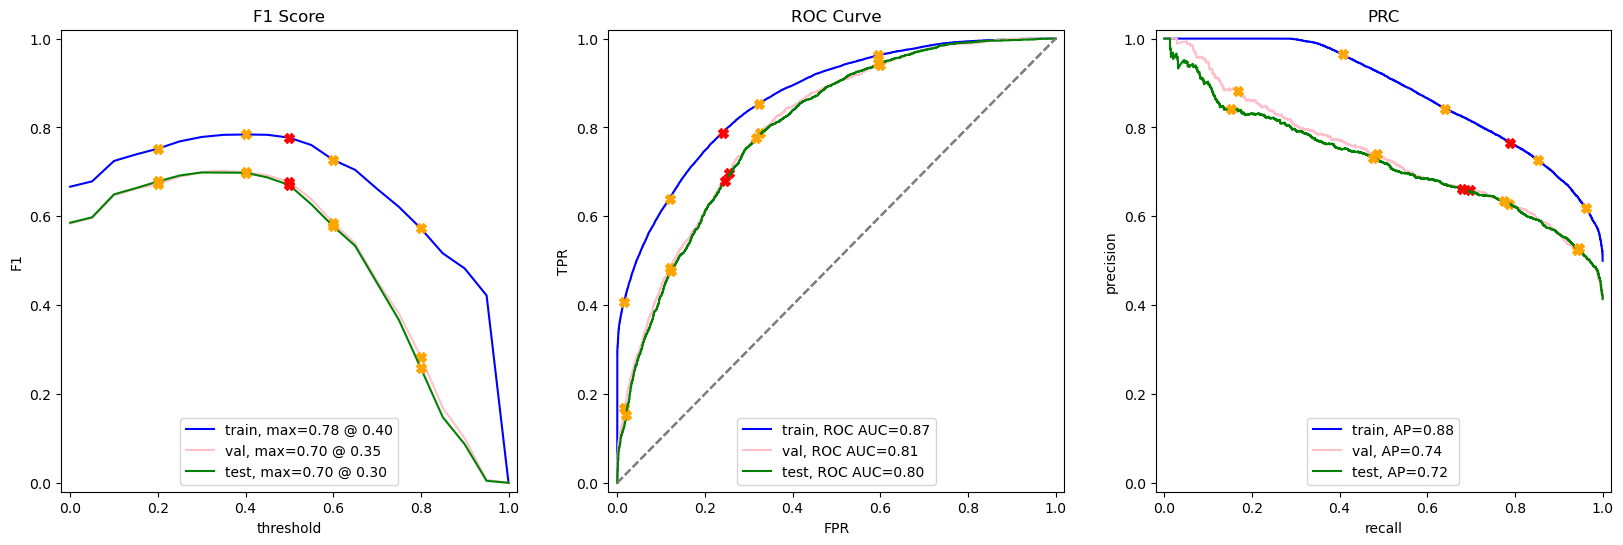

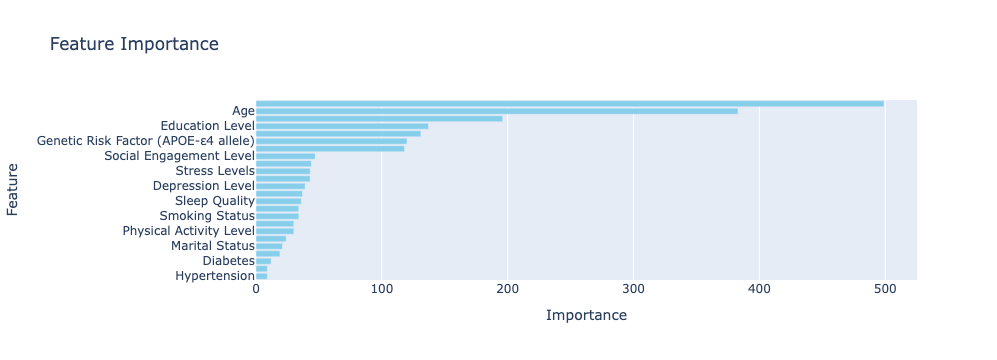

CPU times: user 10min 2s, sys: 1min 58s, total: 12min
Wall time: 1min 42s


In [68]:
%%time

lgbm = LGBMClassifier(verbosity=-1)

# Define a parameter grid to search
param_grid = {
    'num_leaves': [31, 35, 30],
    'max_depth': [3],
    'learning_rate': [0.2, 0.15, 0.1, .12],
    'n_estimators': [325, 300, 275]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, 
                           param_grid=param_grid, 
                           scoring='roc_auc',  # or 'roc_auc' for binary classification
                           cv=5, 
                           verbose=0, 
                           n_jobs=None)

# Fit the model
grid_search.fit(train_ord.drop([target_field], axis=1), train_ord[target_field])

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_lgbm = LGBMClassifier(verbosity=-1, **grid_search.best_params_)

# Fit the model on the training data
best_lgbm.fit(train_ord.drop([target_field], axis=1), train_ord[target_field], 
             eval_set=[(val_ord.drop(columns=target_field, axis=1), val_ord[target_field])], 
             eval_metric='auc')

# Predict on the test set
test_predictions = best_lgbm.predict(test_ord.drop([target_field], axis=1))

# Evaluate the model
structure_confusion_matrix(confusion_matrix(test_ord[target_field], test_predictions))
evaluate_model(model=best_lgbm, train_features=train_ord.drop(columns=target_field, axis=1), train_target=train_ord[target_field], 
                   test_features=test_ord.drop(columns=target_field, axis=1), test_target=test_ord[target_field], 
                   val_features=val_ord.drop(columns=target_field, axis=1), val_target=val_ord[target_field])
        
chart_feature_importance(features_train=train_ord.drop(columns=target_field, axis=1), model=best_lgbm)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300}
Best Score: 0.8599313927361336
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.757409         0.242591
Is  True           0.328455         0.671545

Predicted  False  Predicted  True
Is  False              3297             1056
Is  True               1010             2065

             train       val      test
Accuracy  0.775387  0.727420  0.721863
F1        0.777443  0.676466  0.666559
APS       0.881424  0.735899  0.723632
ROC AUC   0.868824  0.804187  0.800031


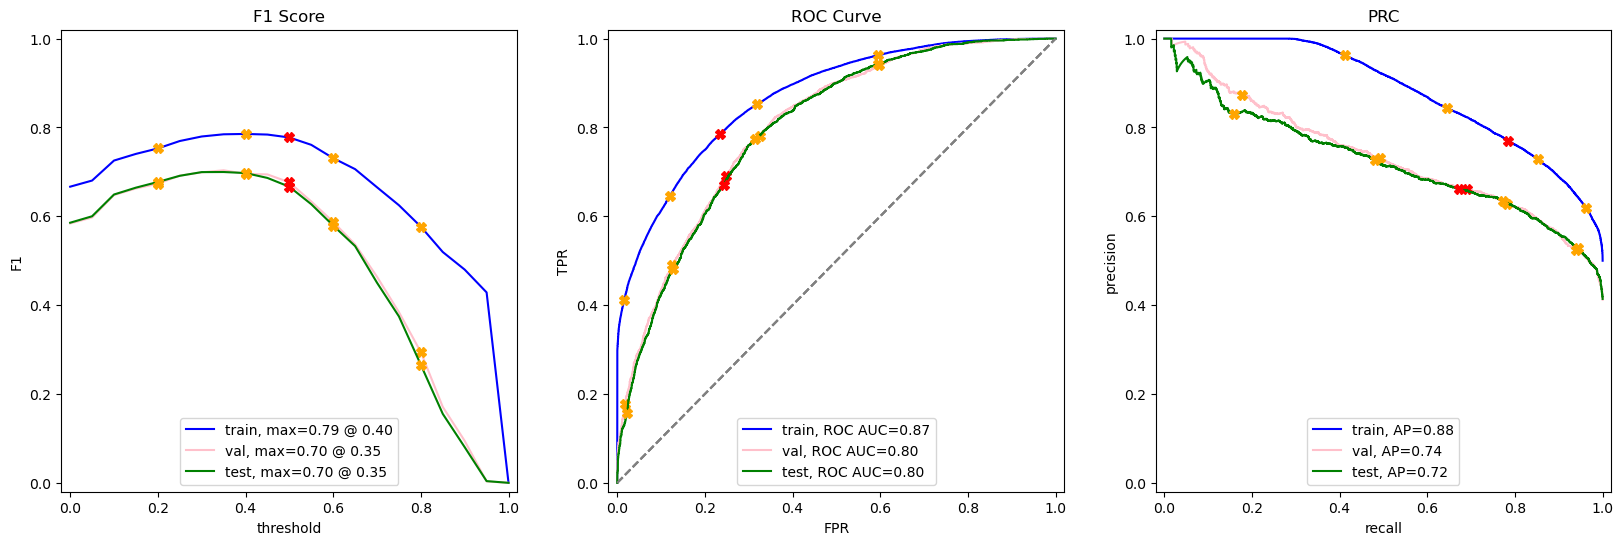

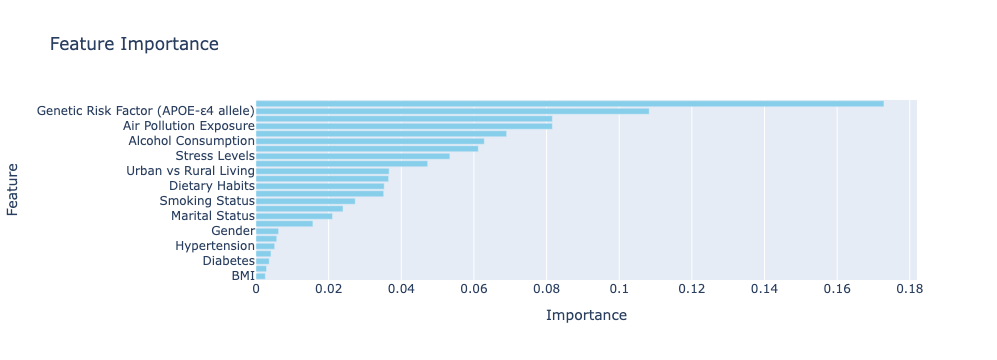

CPU times: user 4h 48min 52s, sys: 45min 44s, total: 5h 34min 37s
Wall time: 45min 59s


In [69]:
%%time

xgb = XGBClassifier(verbosity=1)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinkage
    'max_depth': [3, 4, 5, 6, 7],  # Maximum depth of a tree
    'min_child_weight': [2, 3, 4, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0.1, 0.2, 0.3, 0.4],  # Minimum loss reduction required to make a further partition
 }


# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='roc_auc',  # or 'roc_auc' for binary classification
                           cv=5, 
                           verbose=1, 
                           n_jobs=None)

# Fit the model
grid_search.fit(train_ord.drop([target_field], axis=1), train_ord[target_field])

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_xgb = XGBClassifier(verbosity=0, **grid_search.best_params_)

# Fit the model on the training data
best_xgb.fit(train_ord.drop([target_field], axis=1), train_ord[target_field], 
             eval_set=[(val_ord.drop(columns=target_field, axis=1), val_ord[target_field])], verbose=0)

# Predict on the test set
test_predictions = best_xgb.predict(test_ord.drop([target_field], axis=1))

# Evaluate the model
structure_confusion_matrix(confusion_matrix(test_ord[target_field], test_predictions))
evaluate_model(model=best_xgb, train_features=train_ord.drop(columns=target_field, axis=1), train_target=train_ord[target_field], 
                   test_features=test_ord.drop(columns=target_field, axis=1), test_target=test_ord[target_field], 
                   val_features=val_ord.drop(columns=target_field, axis=1), val_target=val_ord[target_field])
        
chart_feature_importance(features_train=train_ord.drop(columns=target_field, axis=1), model=best_xgb)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 85}
Best Score: 0.8333125460895104
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.727085         0.272915
Is  True           0.276098         0.723902

Predicted  False  Predicted  True
Is  False              3165             1188
Is  True                849             2226

             train       val      test
Accuracy  0.765373  0.723651  0.725767
F1        0.773979  0.687567  0.686084
APS       0.859950  0.725665  0.715381
ROC AUC   0.855481  0.794930  0.792378


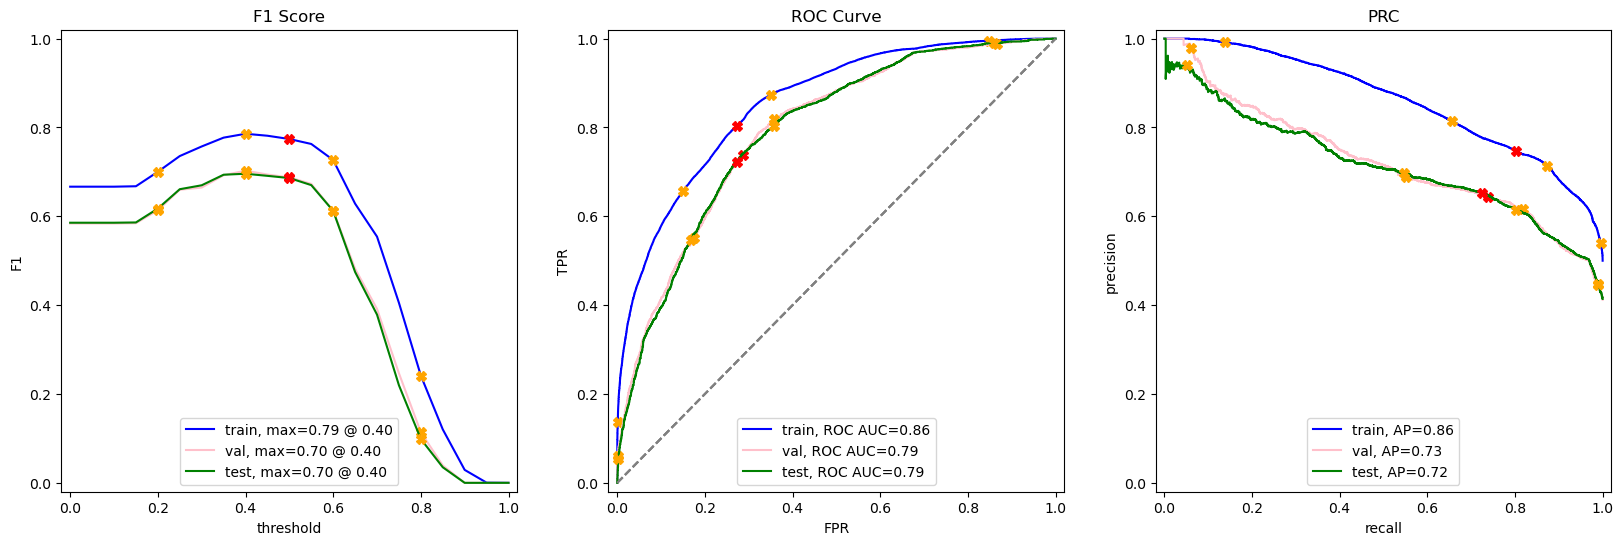

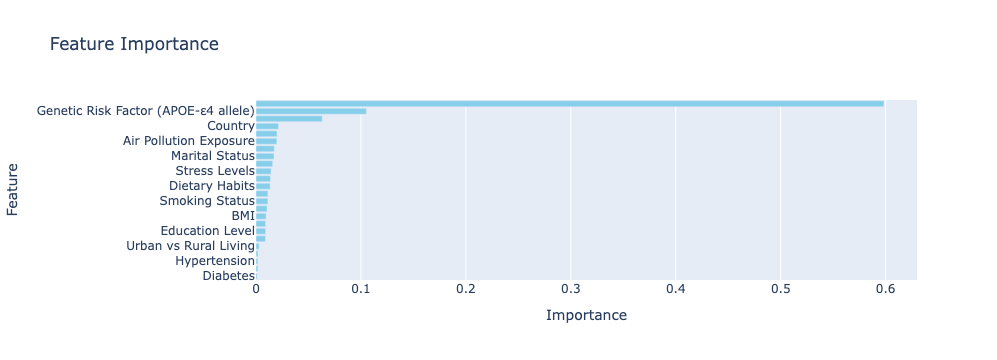

CPU times: user 15min 6s, sys: 18.2 s, total: 15min 24s
Wall time: 15min 26s


In [70]:
%%time

rf = RandomForestClassifier()

# Define a parameter grid to search
param_grid = {
    'n_estimators': [85, 100, 125],       
    'max_depth': [8, 9, 7, 6],      
    'min_samples_split': [3],      
    'min_samples_leaf': [7, 6, 5],        
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           scoring='roc_auc',  # or 'roc_auc' for binary classification
                           cv=5, 
                           verbose=0, 
                           n_jobs=None)

# Fit the model
grid_search.fit(train_ord.drop([target_field], axis=1), train_ord[target_field])

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_rf = RandomForestClassifier(**grid_search.best_params_)

# Fit the model on the training data
best_rf.fit(train_ord.drop([target_field], axis=1), train_ord[target_field])

# Predict on the test set
test_predictions = best_rf.predict(test_ord.drop([target_field], axis=1))

# Evaluate the model
structure_confusion_matrix(confusion_matrix(test_ord[target_field], test_predictions))
evaluate_model(model=best_rf, train_features=train_ord.drop(columns=target_field, axis=1), train_target=train_ord[target_field], 
                   test_features=test_ord.drop(columns=target_field, axis=1), test_target=test_ord[target_field], 
                   val_features=val_ord.drop(columns=target_field, axis=1), val_target=val_ord[target_field])
        
chart_feature_importance(features_train=train_ord.drop(columns=target_field, axis=1), model=best_rf)

### HalvingRandomSearchCV

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'class_weight': None, 'bootstrap': True}
0.843034532842907
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.735585         0.264415
Is  True           0.290081         0.709919

Predicted  False  Predicted  True
Is  False              3202             1151
Is  True                892             2183

             train       val      test
Accuracy  0.911868  0.722170  0.724960
F1        0.910571  0.681678  0.681230
APS       0.981285  0.721618  0.713539
ROC AUC   0.978863  0.793693  0.793550


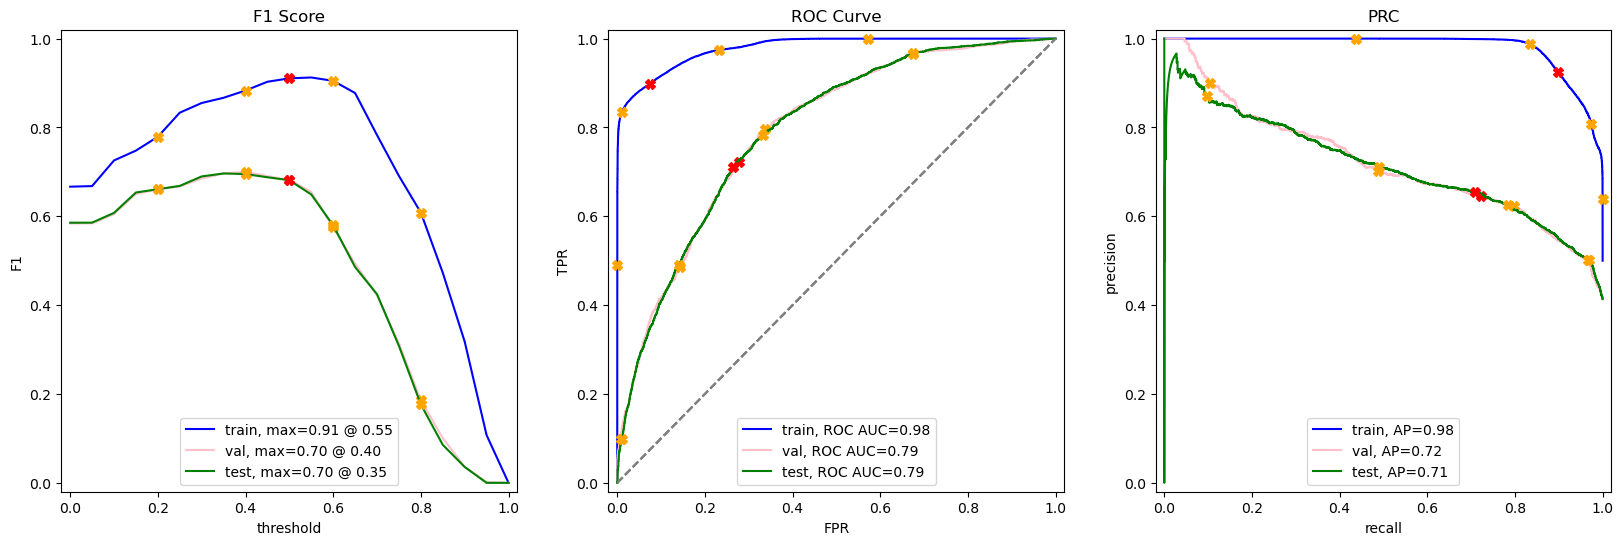

CPU times: user 58min 40s, sys: 33.4 s, total: 59min 14s
Wall time: 59min 24s


In [72]:
%%time

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

rf = RandomForestClassifier(random_state=42)

param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],     # Number of trees in the forest
    'max_depth': [None, 5, 10, 15, 20],            # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 20],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider when looking for the best split
    'bootstrap': [True, False],                     # Whether to use bootstrap samples when building trees
    'class_weight': [None, 'balanced']              # Weights associated with classes
}
search = HalvingRandomSearchCV(rf, param_distributions,
    scoring='roc_auc',  # Optimize for ROC AUC score
    cv=5,
    factor=2,           # Reduce candidates by this factor
    resource='n_samples',  # Resource to be halved
    max_resources='auto',  # Automatically determine the maximum resources
    verbose=0,
    n_jobs=None).fit(train_ord.drop([target_field], axis=1), train_ord[target_field])
print(search.best_params_)
print(search.best_score_)
best_rf = RandomForestClassifier(**search.best_params_)

# Fit the model on the training data
best_rf.fit(train_ord.drop([target_field], axis=1), train_ord[target_field])

# Predict on the test set
test_predictions = best_rf.predict(test_ord.drop([target_field], axis=1))

# Evaluate the model
structure_confusion_matrix(confusion_matrix(test_ord[target_field], test_predictions))
evaluate_model(model=best_rf, train_features=train_ord.drop(columns=target_field, axis=1), train_target=train_ord[target_field], 
                   test_features=test_ord.drop(columns=target_field, axis=1), test_target=test_ord[target_field], 
                   val_features=val_ord.drop(columns=target_field, axis=1), val_target=val_ord[target_field])
        
chart_feature_importance(features_train=train_ord.drop(columns=target_field, axis=1), model=best_rf)

In [73]:
train_ord = train_search.copy()

### RandomForest

I make three models with the RandomForestClassifier varying the sampling methods and encodings. Reports are generated for each model.

Alzheimer’s Diagnosis
1.0    24575
0.0    24575
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.717896         0.282104
Is  True           0.262439         0.737561

Predicted  False  Predicted  True
Is  False              3125             1228
Is  True                807             2268

             train       val      test
Accuracy  0.736521  0.723381  0.726037
F1        0.741733  0.690465  0.690306
APS       0.813024  0.727459  0.712732
ROC AUC   0.818871  0.795514  0.791826


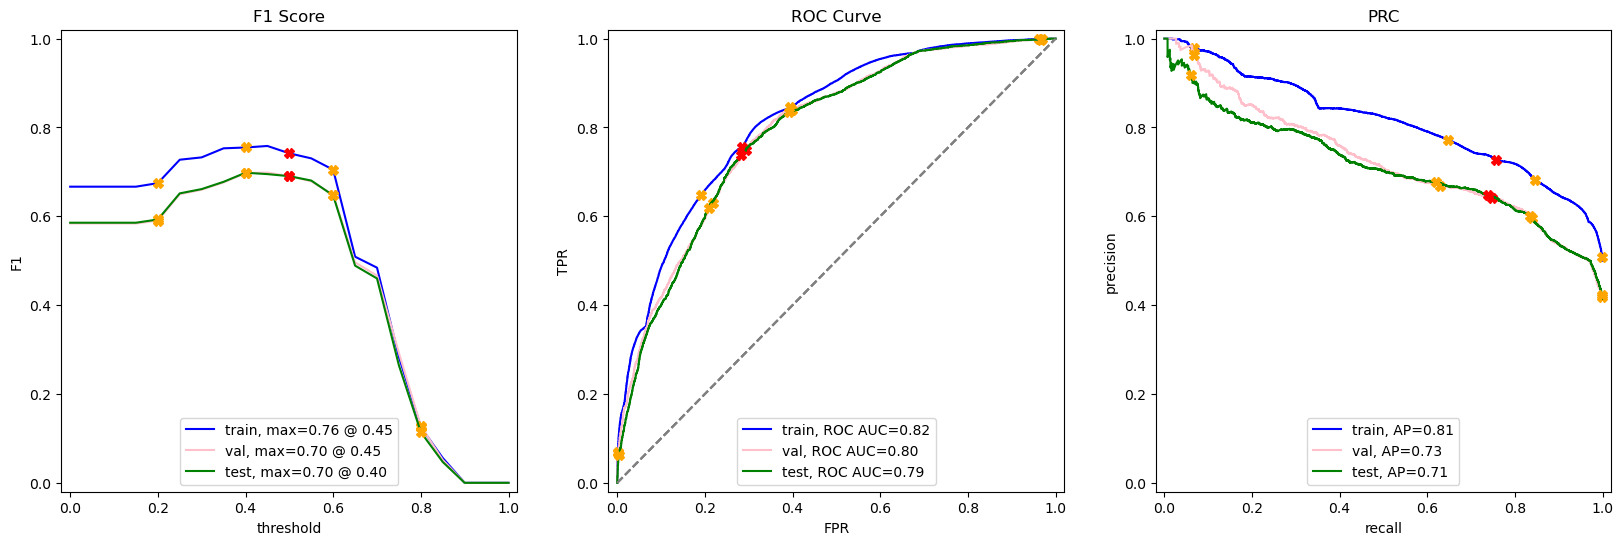

In [76]:
random_forest_model(train_ord, val_ord, test_ord, balanced='balanced', samp='down', target_field=target_field)

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.719963         0.280037
Is  True           0.264715         0.735285

Predicted  False  Predicted  True
Is  False              3134             1219
Is  True                814             2261

             train       val      test
Accuracy  0.738171  0.723112  0.726306
F1        0.743953  0.689416  0.689855
APS       0.812735  0.727744  0.717070
ROC AUC   0.820346  0.795675  0.794572


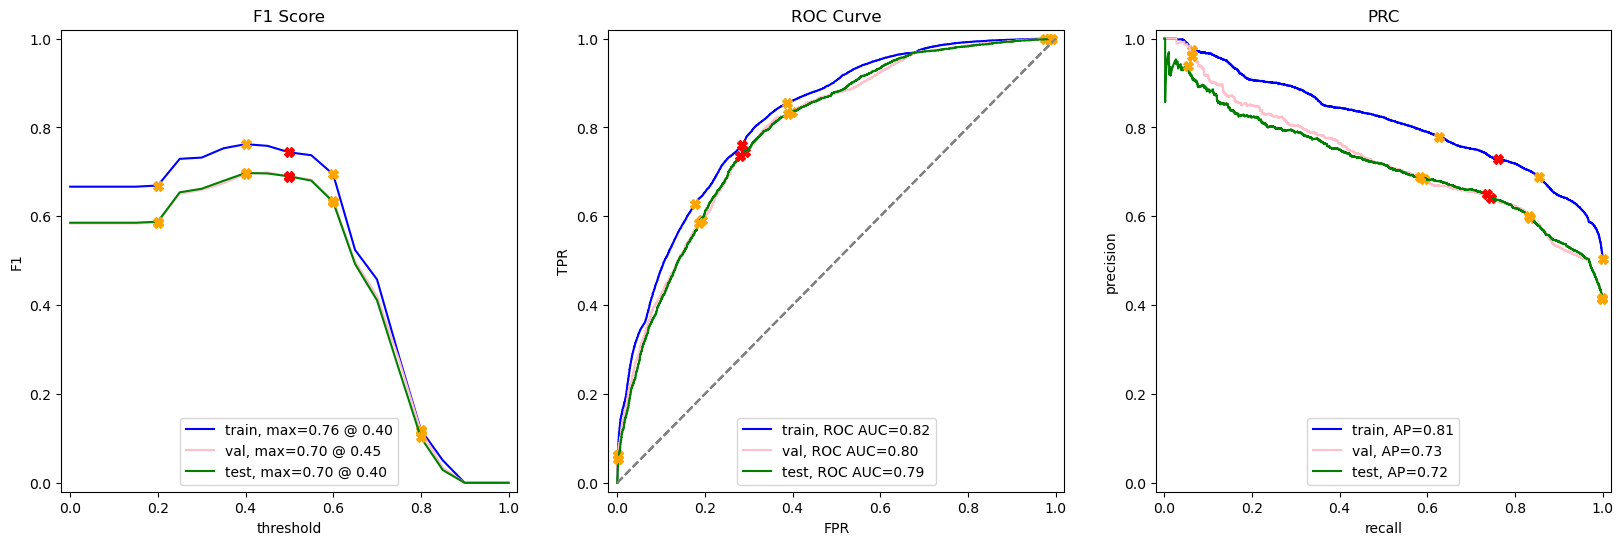

In [77]:
random_forest_model(train_ord, val_ord, test_ord, balanced='balanced', samp='up', target_field=target_field)

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.723409         0.276591
Is  True           0.270244         0.729756

Predicted  False  Predicted  True
Is  False              3149             1204
Is  True                831             2244

             train       val      test
Accuracy  0.758744  0.723112  0.726037
F1        0.767831  0.688286  0.688027
APS       0.846930  0.726633  0.716034
ROC AUC   0.845408  0.795063  0.793048


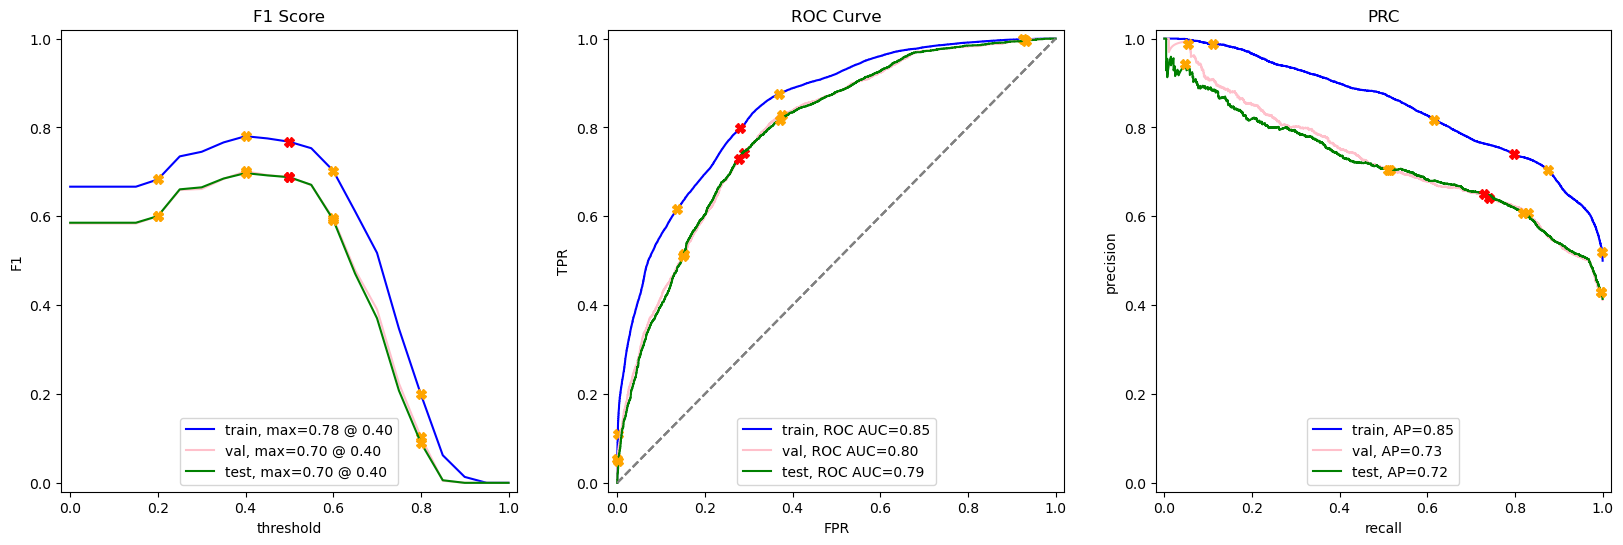

In [78]:
random_forest_model(train_ord, val_ord, test_ord, balanced='balanced', samp='smote', target_field=target_field)

### LightGBM

I make three models with the LightGBM classifier varying the sampling methods and encodings. Reports are generated for each model.

Alzheimer’s Diagnosis
0.0    24575
1.0    24575
Name: count, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.759476         0.240524
Is  True           0.327480         0.672520

Predicted  False  Predicted  True
Is  False              3306             1047
Is  True               1007             2068

             train       val      test
Accuracy  0.742564  0.723920  0.723479
F1        0.734554  0.672312  0.668174
APS       0.819071  0.736320  0.721890
ROC AUC   0.828122  0.803327  0.800471


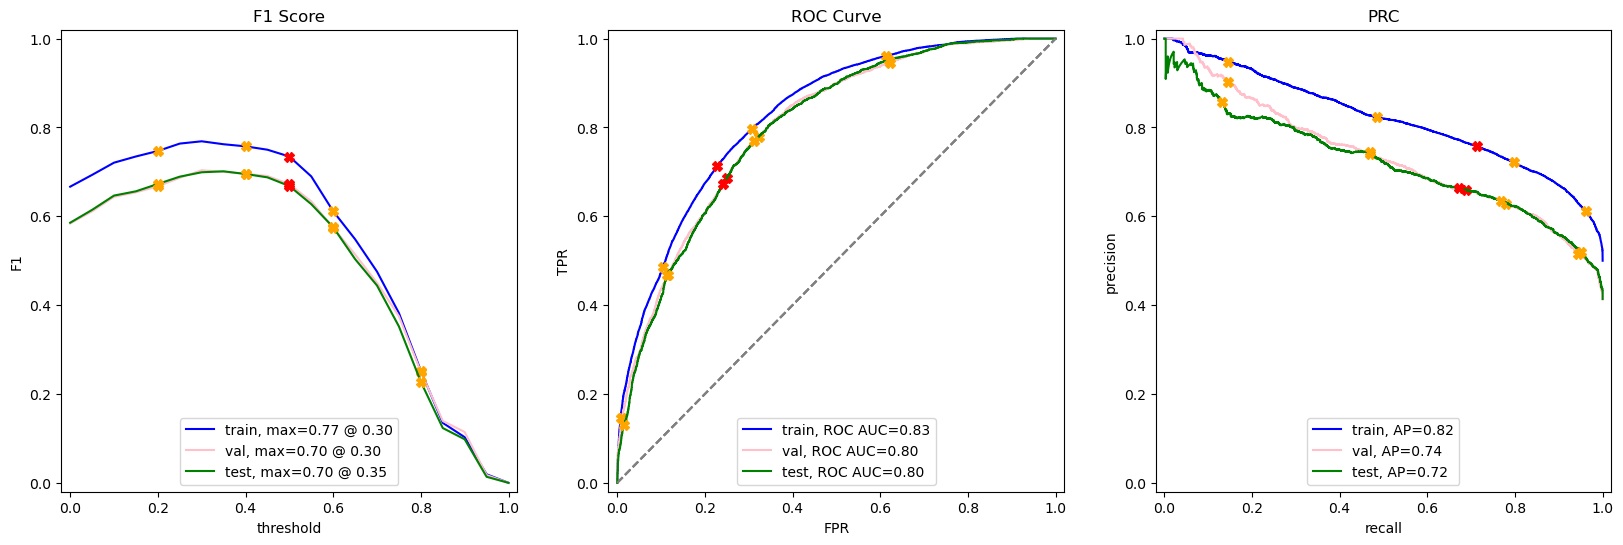

In [81]:
lgbmclassifier(train_ord, val_ord, test_ord, balanced='balanced', samp='down', target_field=target_field)

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.759476         0.240524
Is  True           0.327480         0.672520

Predicted  False  Predicted  True
Is  False              3306             1047
Is  True               1007             2068

             train       val      test
Accuracy  0.743006  0.723920  0.723479
F1        0.735418  0.672312  0.668174
APS       0.819918  0.736320  0.721890
ROC AUC   0.828842  0.803327  0.800471


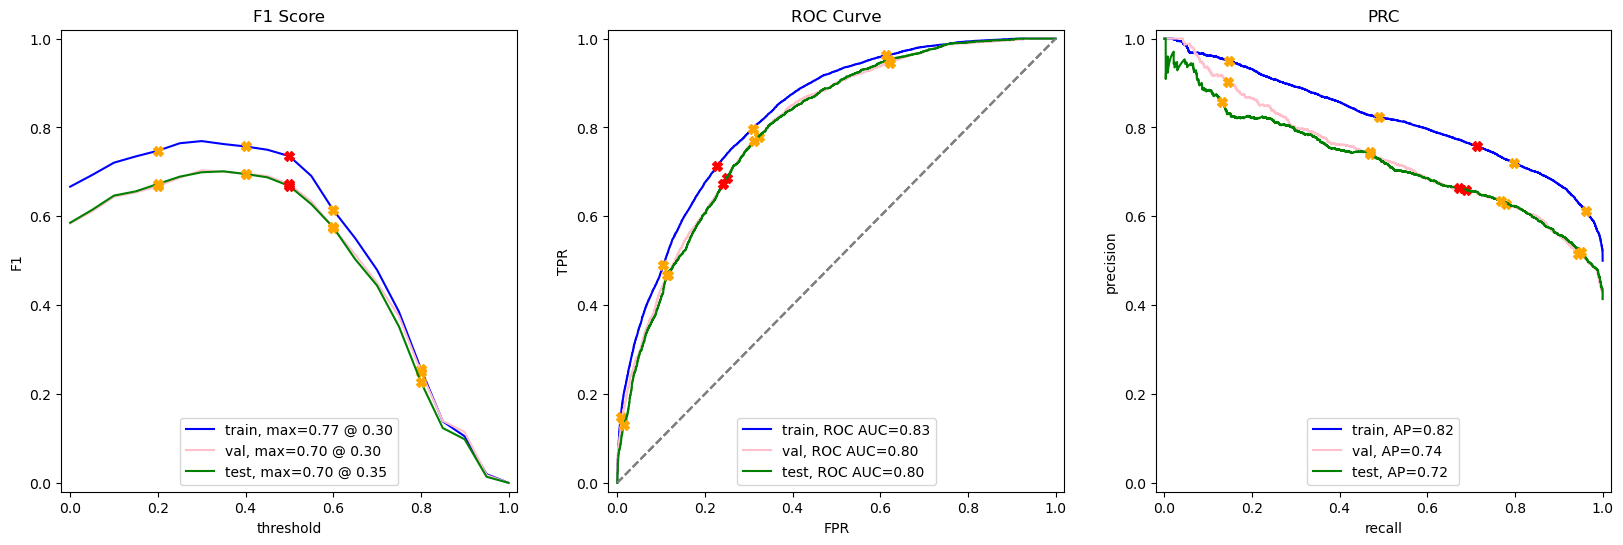

In [82]:
lgbmclassifier(train_ord, val_ord, test_ord, balanced='balanced', samp='up', target_field=target_field)

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.759476         0.240524
Is  True           0.327480         0.672520

Predicted  False  Predicted  True
Is  False              3306             1047
Is  True               1007             2068

             train       val      test
Accuracy  0.743221  0.723920  0.723479
F1        0.735698  0.672312  0.668174
APS       0.819419  0.736320  0.721890
ROC AUC   0.828534  0.803327  0.800471


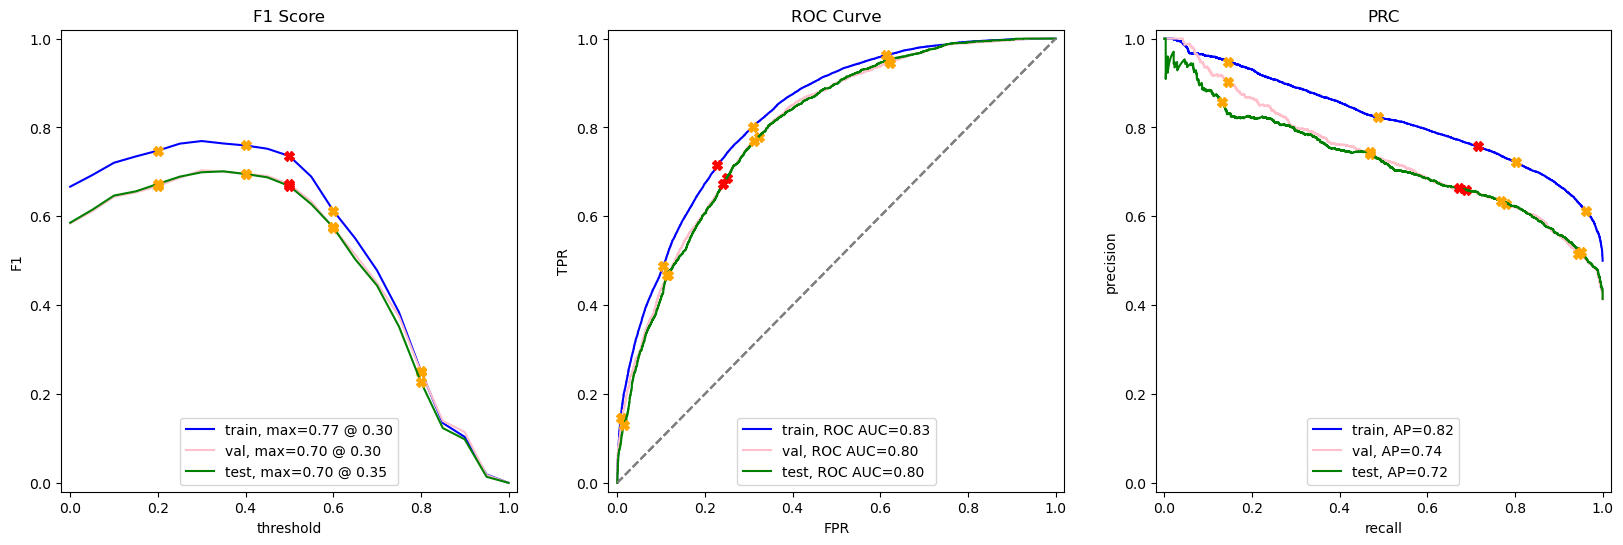

In [83]:
lgbmclassifier(train_ord, val_ord, test_ord, balanced='balanced', samp='smote', target_field=target_field)

### XGBoost

I make three models with the XGBoost classifier varying the sampling methods and encodings. Reports are generated for each model.

Alzheimer’s Diagnosis
0.0    24575
1.0    24575
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.764990         0.235010
Is  True           0.353496         0.646504

Predicted  False  Predicted  True
Is  False              3330             1023
Is  True               1087             1988

             train       val      test
Accuracy  0.784964  0.718805  0.715940
F1        0.774883  0.658939  0.653303
APS       0.873087  0.722051  0.705470
ROC AUC   0.875025  0.794009  0.788365


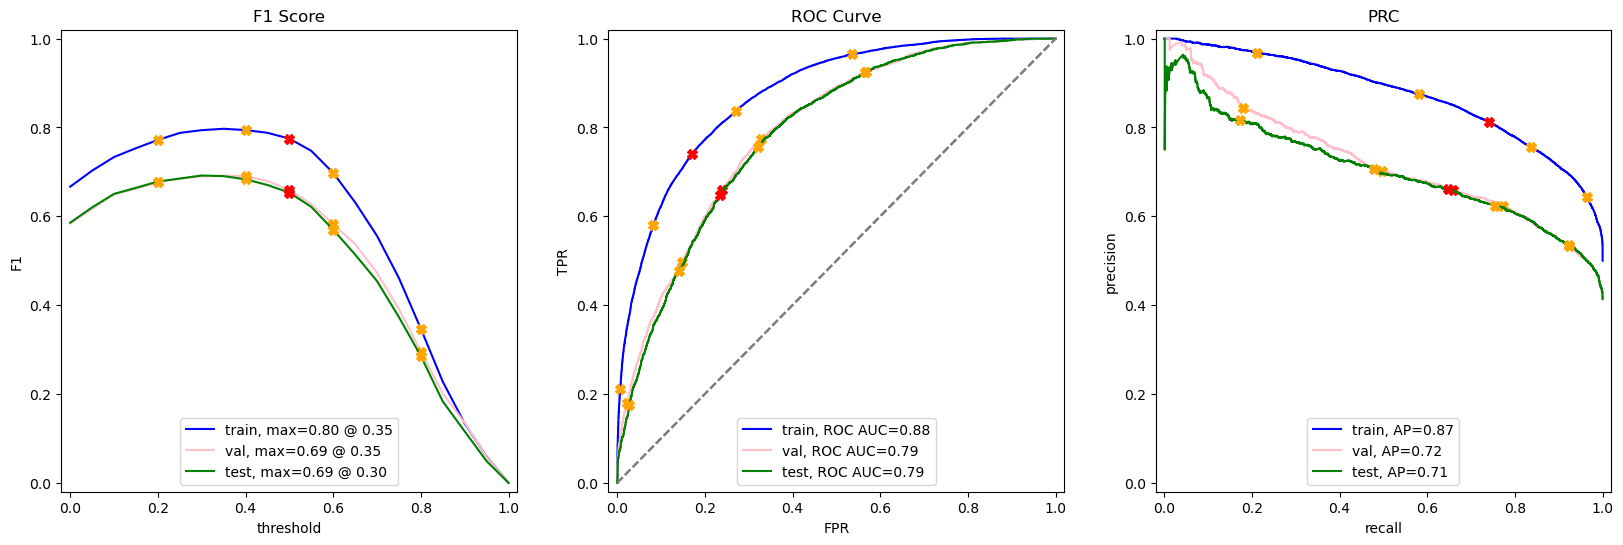

In [86]:
XGBmodel(train_ord, val_ord, test_ord, balanced='balanced', samp='down', target_field=target_field)

Alzheimer’s Diagnosis
1.0    34851
0.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.764990         0.235010
Is  True           0.353496         0.646504

Predicted  False  Predicted  True
Is  False              3330             1023
Is  True               1087             1988

             train       val      test
Accuracy  0.784296  0.718805  0.715940
F1        0.774375  0.658939  0.653303
APS       0.873407  0.722051  0.705470
ROC AUC   0.874961  0.794009  0.788365


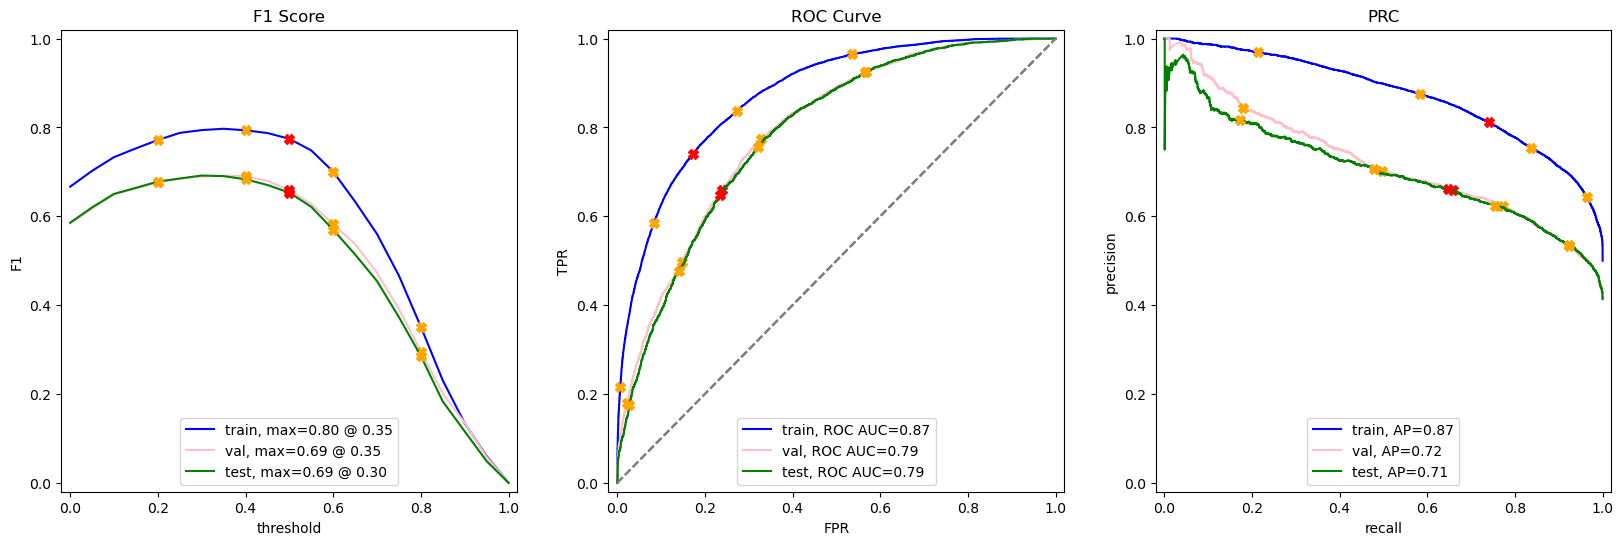

In [87]:
XGBmodel(train_ord, val_ord, test_ord, balanced='balanced', samp='up', target_field=target_field)

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.764990         0.235010
Is  True           0.353496         0.646504

Predicted  False  Predicted  True
Is  False              3330             1023
Is  True               1087             1988

             train       val      test
Accuracy  0.774253  0.718805  0.715940
F1        0.761363  0.658939  0.653303
APS       0.863509  0.722051  0.705470
ROC AUC   0.865338  0.794009  0.788365


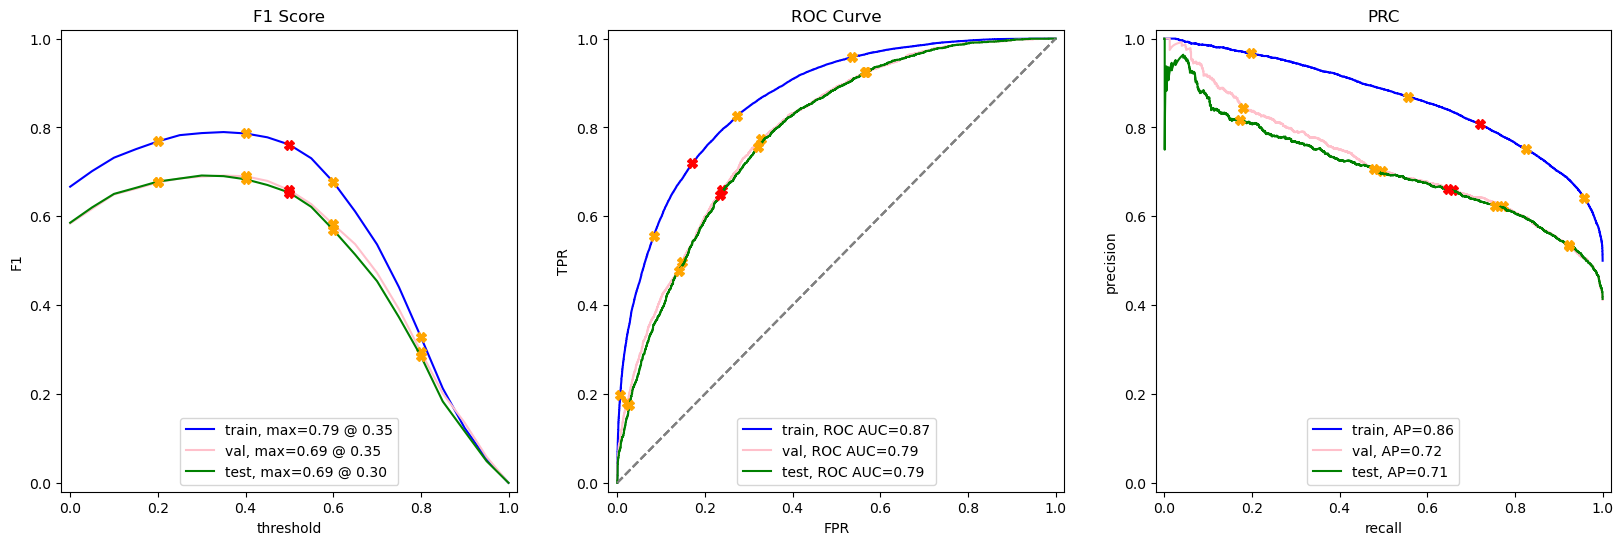

In [88]:
XGBmodel(train_ord, val_ord, test_ord, balanced='balanced', samp='smote', target_field=target_field)

### Stochastic Gradient Descent

I make only one model with the SGD classifier and upsampling the target.

Alzheimer’s Diagnosis
1.0    34851
0.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.788422         0.211578
Is  True           0.408780         0.591220

Predicted  False  Predicted  True
Is  False              3432              921
Is  True               1257             1818

             train       val      test
Accuracy  0.694485  0.717862  0.706785
F1        0.663336  0.640233  0.625387
APS       0.765638  0.712413  0.698318
ROC AUC   0.784045  0.790435  0.782637


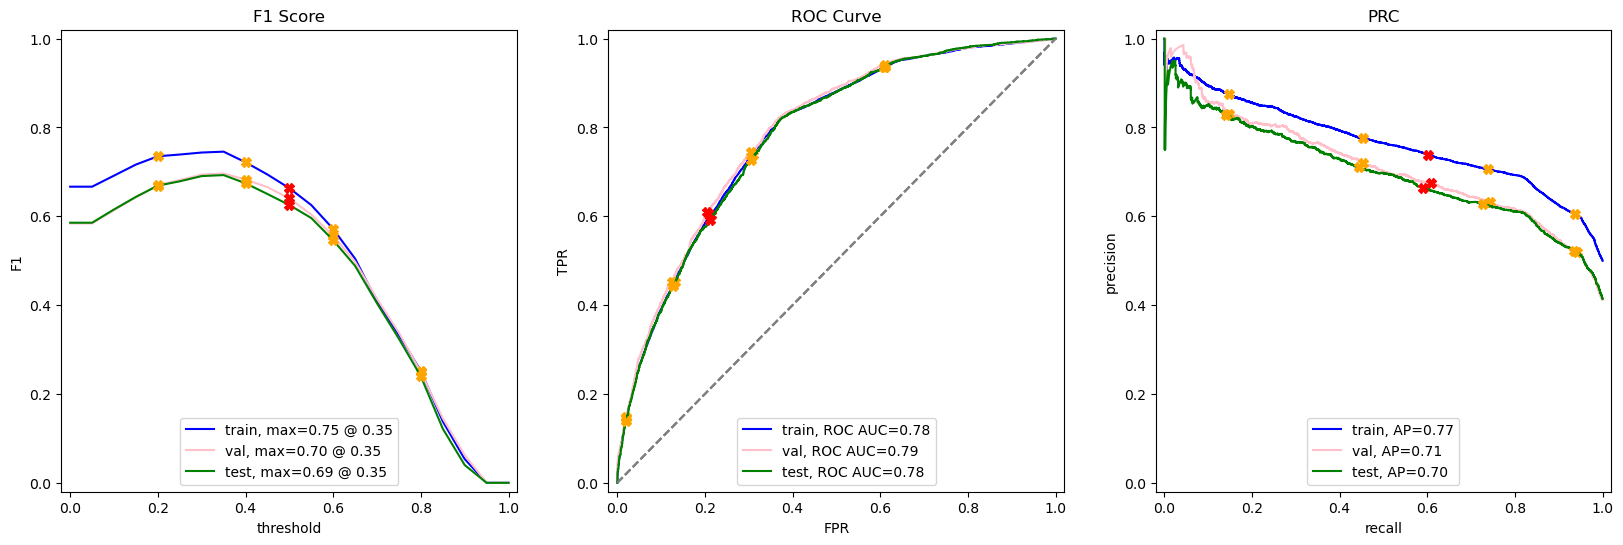

In [91]:
sgd_classifier(train_ord, val_ord, test_ord, balanced='balanced', samp='up', target_field=target_field)

### CatBoostClassifier

I make three models with the CatBoostClassifier varying the sampling methods and encodings. Reports are generated for each model.

Alzheimer’s Diagnosis
0.0    24575
1.0    24575
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.740639         0.259361
Is  True           0.298537         0.701463

Predicted  False  Predicted  True
Is  False              3224             1129
Is  True                918             2157

             train       val      test
Accuracy  0.731699  0.724862  0.724421
F1        0.729259  0.682016  0.678195
APS       0.799783  0.735935  0.724179
ROC AUC   0.810830  0.804524  0.800321


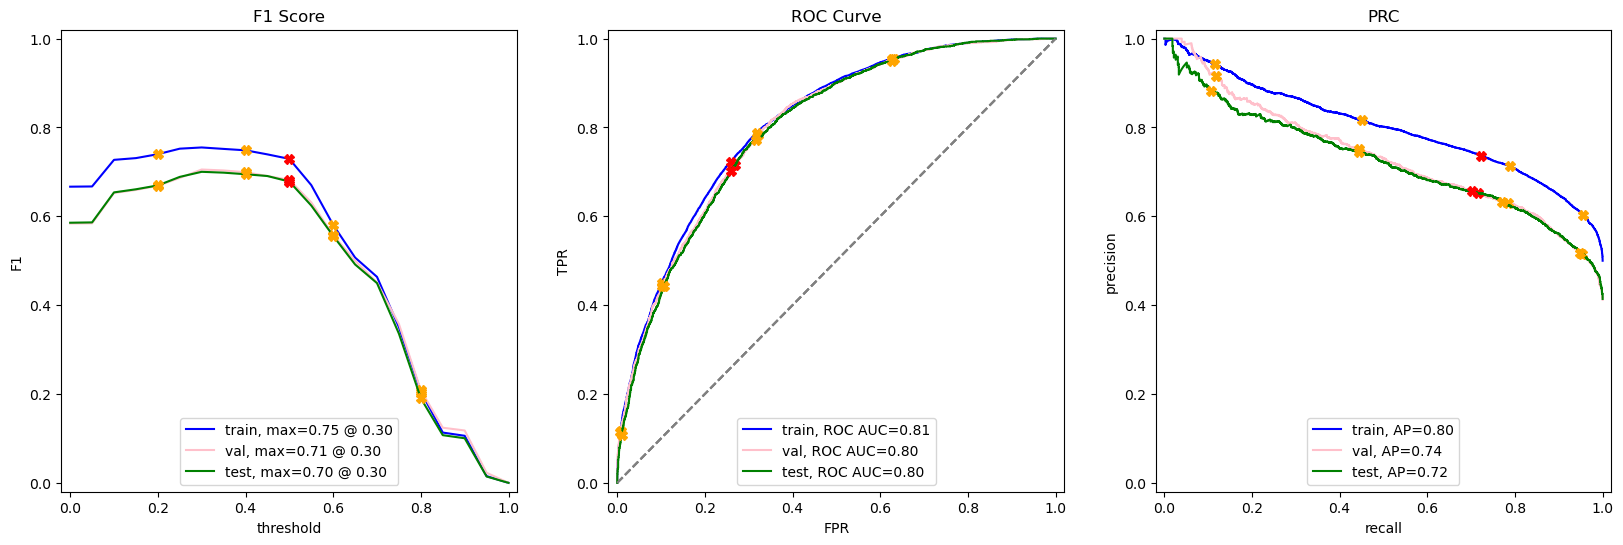

In [94]:
CatBoostClassifier_model(train_ord, val_ord, test_ord, balanced='balanced', samp='down', target_field=target_field)

Alzheimer’s Diagnosis
1.0    34851
0.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.740639         0.259361
Is  True           0.298537         0.701463

Predicted  False  Predicted  True
Is  False              3224             1129
Is  True                918             2157

             train       val      test
Accuracy  0.730897  0.724862  0.724421
F1        0.728910  0.682016  0.678195
APS       0.800009  0.735935  0.724179
ROC AUC   0.810985  0.804524  0.800321


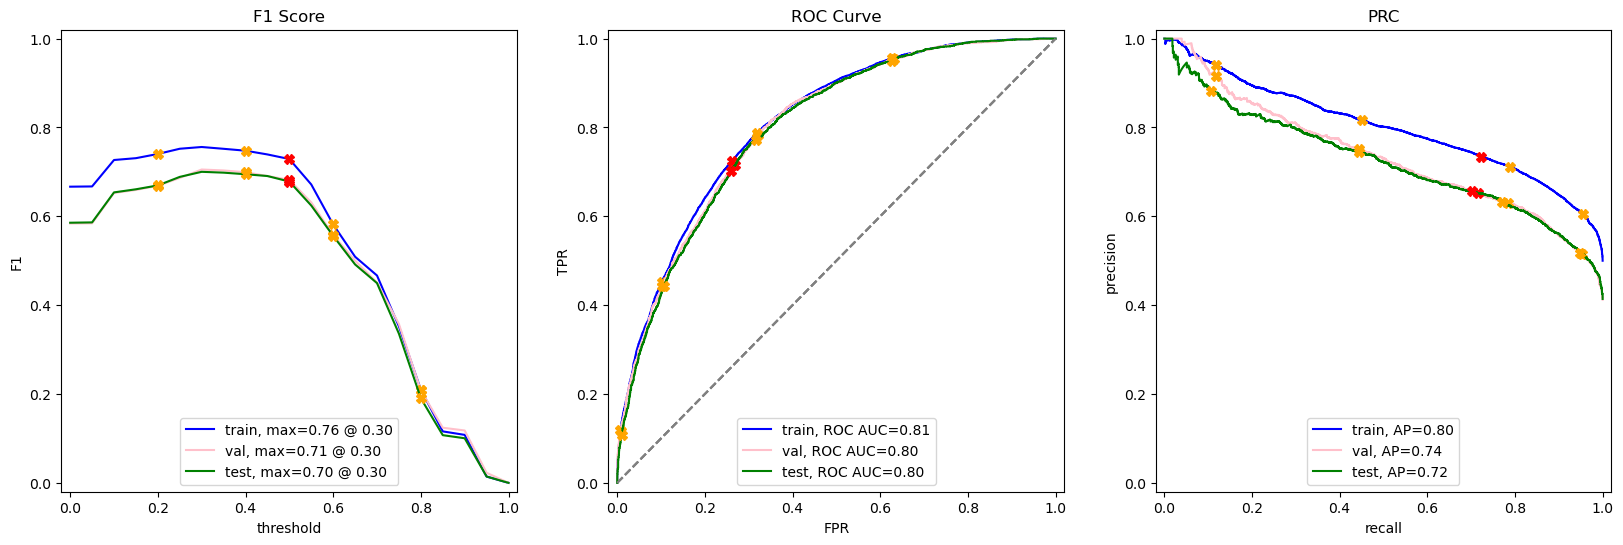

In [95]:
CatBoostClassifier_model(train_ord, val_ord, test_ord, balanced='balanced', samp='up', target_field=target_field)

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.740639         0.259361
Is  True           0.298537         0.701463

Predicted  False  Predicted  True
Is  False              3224             1129
Is  True                918             2157

             train       val      test
Accuracy  0.733594  0.724862  0.724421
F1        0.732354  0.682016  0.678195
APS       0.800949  0.735935  0.724179
ROC AUC   0.813277  0.804524  0.800321


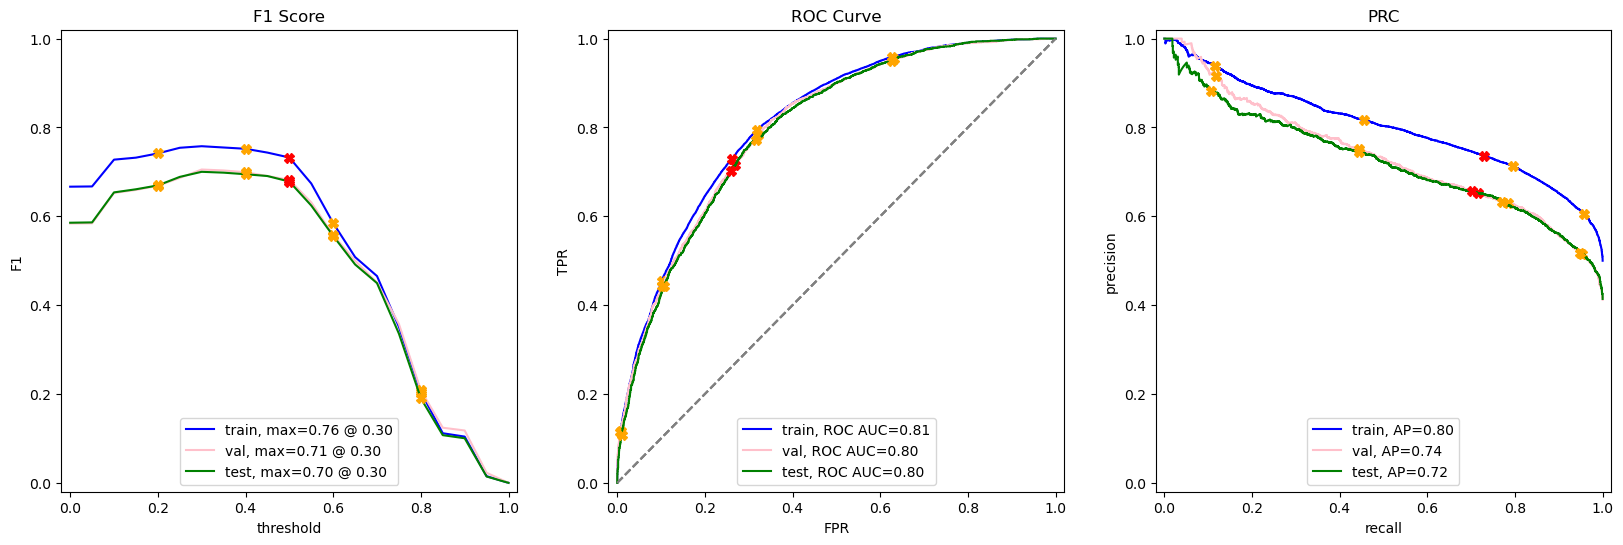

In [96]:
CatBoostClassifier_model(train_ord, val_ord, test_ord, balanced='balanced', samp='smote', target_field=target_field)

### Extra Trees

I make three models with the ExtraTreesClassifier varying the sampling methods and encodings. Reports are generated for each model.

Alzheimer’s Diagnosis
0.0    24575
1.0    24575
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.677234         0.322766
Is  True           0.256585         0.743415

Predicted  False  Predicted  True
Is  False              2948             1405
Is  True                789             2286

             train       val      test
Accuracy  0.724456  0.711267  0.704631
F1        0.735069  0.684420  0.675732
APS       0.790786  0.717840  0.703239
ROC AUC   0.800075  0.790234  0.783736


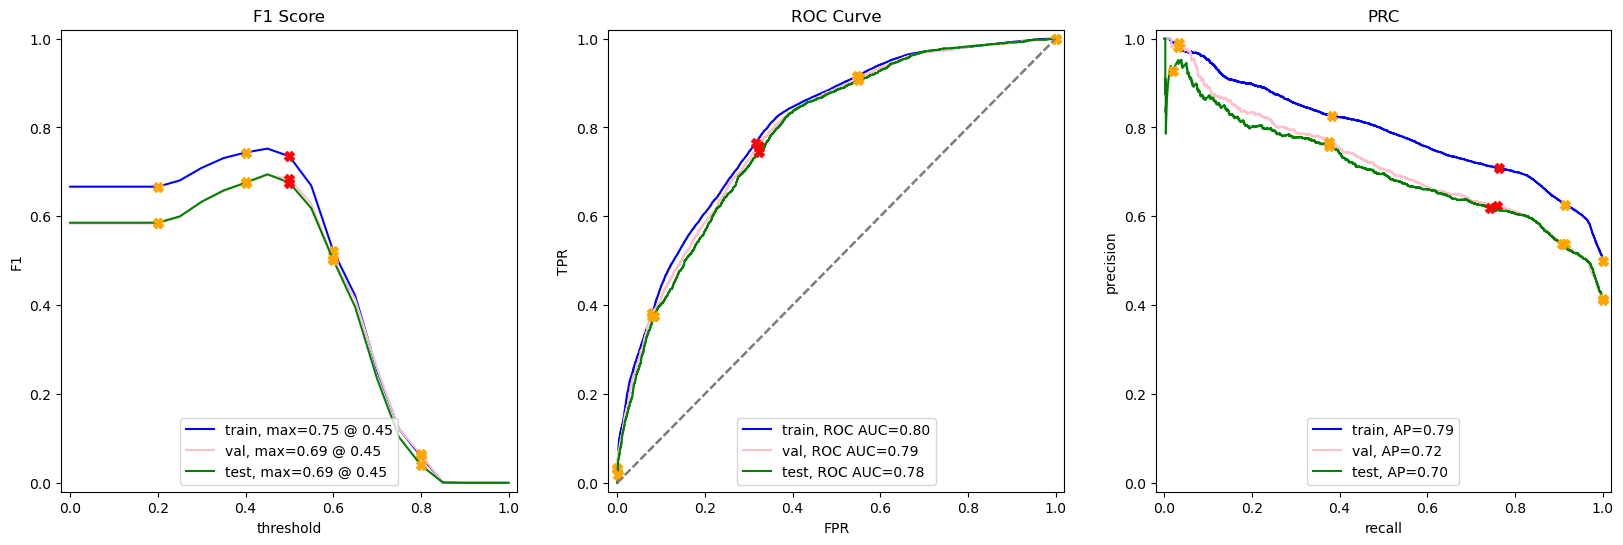

In [99]:
extra_trees_model(train_ord, val_ord, test_ord, balanced='balanced', samp='down', target_field=target_field)

Alzheimer’s Diagnosis
1.0    34851
0.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.690558         0.309442
Is  True           0.284878         0.715122

Predicted  False  Predicted  True
Is  False              3006             1347
Is  True                876             2199

             train       val      test
Accuracy  0.720338  0.709248  0.700727
F1        0.728082  0.677033  0.664250
APS       0.791580  0.716298  0.702528
ROC AUC   0.801137  0.789708  0.782545


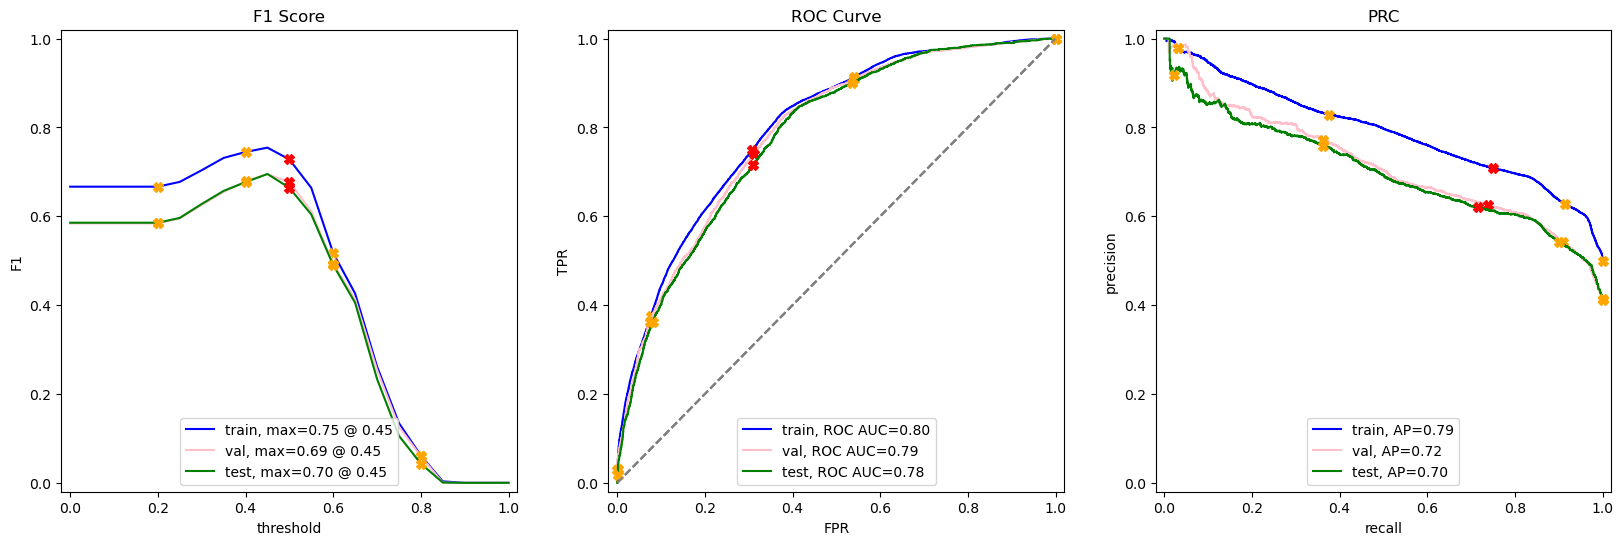

In [100]:
extra_trees_model(train_ord, val_ord, test_ord, balanced='balanced', samp='up', target_field=target_field)

Alzheimer’s Diagnosis
0.0    34851
1.0    34851
Name: count, dtype: int64
Confusion  matrixes  for  the  model  are  below,  first  by  percentage,  then  by  instances.


Predicted  False  Predicted  True
Is  False          0.691477         0.308523
Is  True           0.266667         0.733333

Predicted  False  Predicted  True
Is  False              3010             1343
Is  True                820             2255

             train       val      test
Accuracy  0.740696  0.714766  0.708805
F1        0.752513  0.684344  0.675858
APS       0.812533  0.719480  0.704904
ROC AUC   0.821298  0.792733  0.784993


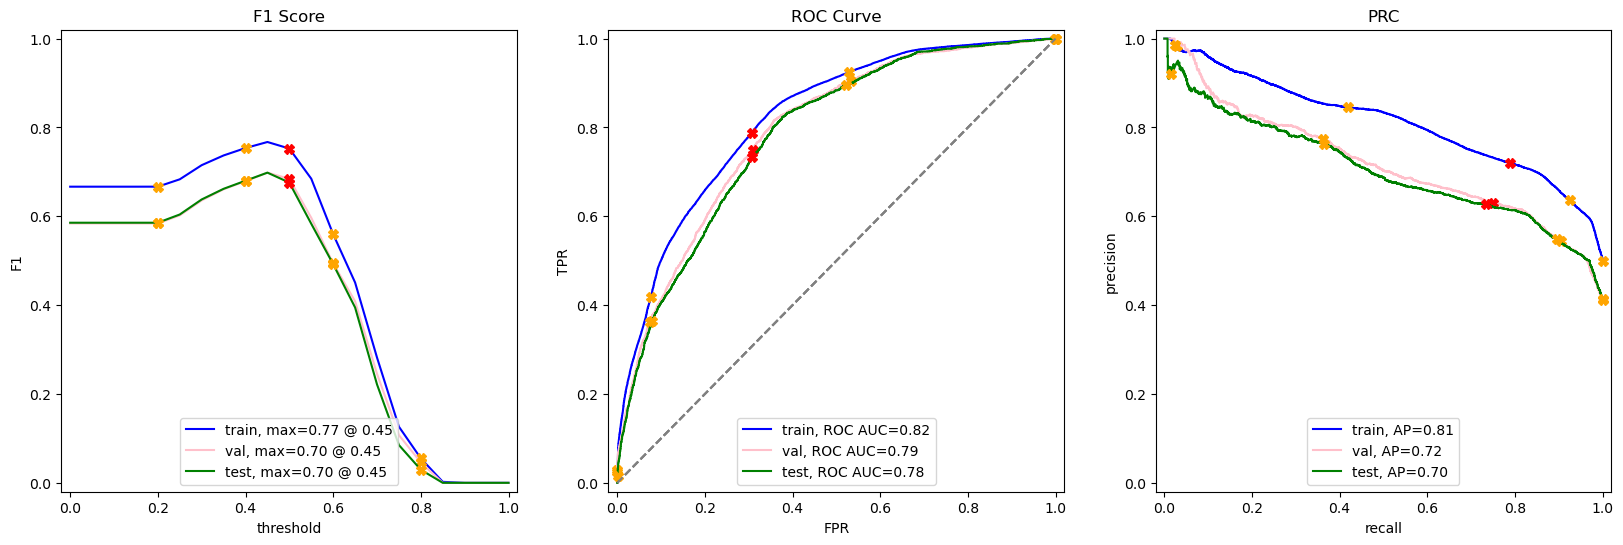

In [101]:
extra_trees_model(train_ord, val_ord, test_ord, balanced='balanced', samp='smote', target_field=target_field)

## Conclusions

In [103]:
eval_stats_all = eval_stats_all.drop_duplicates()
eval_stats_all.sort_values(by='test_roc_auc', ascending=False)

model_name                                         full_model  \
11          LGBMClassifier  LGBMClassifier(boosting_type=gbdt, class_weigh...   
18      CatBoostClassifier  CatBoostClassifier(iterations=500, learning_ra...   
4           LGBMClassifier  LGBMClassifier(boosting_type=gbdt, class_weigh...   
5            XGBClassifier  XGBClassifier(objective=binary:logistic, base_...   
9   RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
7   RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
10  RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
6   RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
8   RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
14           XGBClassifier  XGBClassifier(objective=binary:logistic, base_...   
23    ExtraTreesClassifier  ExtraTreesClassifier(bootstrap=True, ccp_alpha...   
21    ExtraTreesClassifier  ExtraTreesClassifier(bootstrap=True, ccp_alpha...   
1       LogisticRegression  LogisticRegression(C=1.0, class_weight=balance...   
3       LogisticRegression  LogisticRegression(C=1.0, class_weight=balance...   
17           SGDClassifier  SGDClassifier(alpha=0.0001, average=False, cla...   
2       LogisticRegression  LogisticRegression(C=1.0, class_weight=balance...   
22    ExtraTreesClassifier  ExtraTreesClassifier(bootstrap=True, ccp_alpha...   
0          DummyClassifier  DummyClassifier(constant=1, random_state=42, s...   

    test_accuracy   test_f1  test_roc_auc  test_aps  
11       0.723479  0.668174      0.800471  0.721890  
18       0.724421  0.678195      0.800321  0.724179  
4        0.723479  0.670199      0.800302  0.723832  
5        0.721863  0.666559      0.800031  0.723632  
9        0.726306  0.689855      0.794572  0.717070  
7        0.724960  0.681230      0.793550  0.713539  
10       0.726037  0.688027      0.793048  0.716034  
6        0.725767  0.686084      0.792378  0.715381  
8        0.726037  0.690306      0.791826  0.712732  
14       0.715940  0.653303      0.788365  0.705470  
23       0.708805  0.675858      0.784993  0.704904  
21       0.704631  0.675732      0.783736  0.703239  
1        0.707593  0.666462      0.782858  0.698086  
3        0.708670  0.667996      0.782646  0.697759  
17       0.706785  0.625387      0.782637  0.698318  
2        0.709882  0.670136      0.782617  0.698090  
22       0.700727  0.664250      0.782545  0.702528  
0        0.413974  0.585547      0.500000  0.413974

Because of the way the dataframe is concatenated the index also represents the order in which these models were run and the order in which they appear in the 'Testing' section. The dataframe has been sorted to provide the models with the highest AUC-ROC score. I drop duplicates and resave the dataframe to ensure if any of the testing cells are run repeatedly, those results do not skew the above dataframe or any dependent code.

In [105]:
fig = px.bar(eval_stats_all.sort_values(by='test_roc_auc', ascending=False).reset_index(drop=True).head(5), hover_data={'model_name': True},
             y='test_roc_auc', title='Top Performing Models')
fig.show()

In [106]:
eval_stats_all.sort_values(by='test_roc_auc', ascending=False).reset_index(drop=True).head(8)

model_name                                         full_model  \
0          LGBMClassifier  LGBMClassifier(boosting_type=gbdt, class_weigh...   
1      CatBoostClassifier  CatBoostClassifier(iterations=500, learning_ra...   
2          LGBMClassifier  LGBMClassifier(boosting_type=gbdt, class_weigh...   
3           XGBClassifier  XGBClassifier(objective=binary:logistic, base_...   
4  RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
5  RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
6  RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
7  RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   

   test_accuracy   test_f1  test_roc_auc  test_aps  
0       0.723479  0.668174      0.800471  0.721890  
1       0.724421  0.678195      0.800321  0.724179  
2       0.723479  0.670199      0.800302  0.723832  
3       0.721863  0.666559      0.800031  0.723632  
4       0.726306  0.689855      0.794572  0.717070  
5       0.724960  0.681230      0.793550  0.713539  
6       0.726037  0.688027      0.793048  0.716034  
7       0.725767  0.686084      0.792378  0.715381

The above view of the dataframe is provided to add more context to the bar graph above. The below cells show which model performed best in the other metrics that were not the primary metric.

In [108]:
eval_stats_all.sort_values(by='test_accuracy', ascending=False).head(1)

model_name                                         full_model  \
9  RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   

   test_accuracy   test_f1  test_roc_auc  test_aps  
9       0.726306  0.689855      0.794572   0.71707

In [109]:
pd.set_option('display.max_colwidth', None)
eval_stats_all.sort_values(by='test_accuracy', ascending=False).head(0)['full_model']

Series([], Name: full_model, dtype: object)

In [110]:
pd.reset_option('display.max_colwidth')

In [111]:
eval_stats_all.sort_values(by='test_f1', ascending=False).head(1)

model_name                                         full_model  \
8  RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   

   test_accuracy   test_f1  test_roc_auc  test_aps  
8       0.726037  0.690306      0.791826  0.712732

In [112]:
eval_stats_all.sort_values(by='test_aps', ascending=False).head(1)

model_name                                         full_model  \
18  CatBoostClassifier  CatBoostClassifier(iterations=500, learning_ra...   

    test_accuracy   test_f1  test_roc_auc  test_aps  
18       0.724421  0.678195      0.800321  0.724179

In [113]:
eval_stats_all.reset_index(drop=True)

model_name                                         full_model  \
0          DummyClassifier  DummyClassifier(constant=1, random_state=42, s...   
1       LogisticRegression  LogisticRegression(C=1.0, class_weight=balance...   
2       LogisticRegression  LogisticRegression(C=1.0, class_weight=balance...   
3       LogisticRegression  LogisticRegression(C=1.0, class_weight=balance...   
4           LGBMClassifier  LGBMClassifier(boosting_type=gbdt, class_weigh...   
5            XGBClassifier  XGBClassifier(objective=binary:logistic, base_...   
6   RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
7   RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
8   RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
9   RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
10  RandomForestClassifier  RandomForestClassifier(bootstrap=True, ccp_alp...   
11          LGBMClassifier  LGBMClassifier(boosting_type=gbdt, class_weigh...   
12           XGBClassifier  XGBClassifier(objective=binary:logistic, base_...   
13           SGDClassifier  SGDClassifier(alpha=0.0001, average=False, cla...   
14      CatBoostClassifier  CatBoostClassifier(iterations=500, learning_ra...   
15    ExtraTreesClassifier  ExtraTreesClassifier(bootstrap=True, ccp_alpha...   
16    ExtraTreesClassifier  ExtraTreesClassifier(bootstrap=True, ccp_alpha...   
17    ExtraTreesClassifier  ExtraTreesClassifier(bootstrap=True, ccp_alpha...   

    test_accuracy   test_f1  test_roc_auc  test_aps  
0        0.413974  0.585547      0.500000  0.413974  
1        0.707593  0.666462      0.782858  0.698086  
2        0.709882  0.670136      0.782617  0.698090  
3        0.708670  0.667996      0.782646  0.697759  
4        0.723479  0.670199      0.800302  0.723832  
5        0.721863  0.666559      0.800031  0.723632  
6        0.725767  0.686084      0.792378  0.715381  
7        0.724960  0.681230      0.793550  0.713539  
8        0.726037  0.690306      0.791826  0.712732  
9        0.726306  0.689855      0.794572  0.717070  
10       0.726037  0.688027      0.793048  0.716034  
11       0.723479  0.668174      0.800471  0.721890  
12       0.715940  0.653303      0.788365  0.705470  
13       0.706785  0.625387      0.782637  0.698318  
14       0.724421  0.678195      0.800321  0.724179  
15       0.704631  0.675732      0.783736  0.703239  
16       0.700727  0.664250      0.782545  0.702528  
17       0.708805  0.675858      0.784993  0.704904

In [114]:
final_time = time.time() - initial_time
print('Notebook time: ', final_time)

Notebook time:  7410.874283075333


In [115]:
print(final_time / 60, 'minutes to run this notebook.')

123.51457138458888 minutes to run this notebook.


The vast majority of these models have similar performance metrics. With the exception of the the dummy model, all recorded metrics exist within three-hundreths of each other. The RandomForestClassifier model at index 9 in the table above has the best accuracy and f1 score. The CatBoostClassifier at index 14 has the highest aps on the test set. The LGBMClassifier at index 11 has the best AUC-ROC score. 

Deep learning algorithms will be explored to see if those models are a better fit for this type of data in a subsequent notebook.